In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import pandas as pd # data processing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv1D,Dropout,LSTM, Bidirectional
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from keras.layers import BatchNormalization, Dropout
from keras.layers import Dense, Activation
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
import torch
from torch.nn import Transformer
from sklearn.preprocessing import StandardScaler #good
from sklearn.preprocessing import MinMaxScaler,MaxAbsScaler
from sklearn import metrics #accuracy measure
import joblib
import warnings

In [2]:
def second_turn(label,dif):
    if label>0:
        return 0
    if label==0:
        return dif

In [3]:
training_set=os.listdir("./training_set_df_acc_window5/")
df=None
for data in training_set:
    if data.endswith('.csv'):
        file=f"./training_set_df_acc_window5/{data}"
        if df is None:
            df=pd.read_csv(file)
            df=df.astype(float)
            print(df.shape)
            df['previous_label']=df['label']
            
            df['label']=df['label'].astype("category")
            df['previous_label']=df['label']
            df['previous_label']=df['previous_label'].astype(int)
            df['second_turn']=df['previous_label'].diff()
            df['second_turn']=df.apply(lambda df:second_turn(df['label'],df['second_turn']),axis=1)
            turn=list(df['second_turn'])
            turn_2=[]
            
            if (df['label'][0].item()>0): 
                count=2
            else: 
                count=1
            for i in range(len(turn)):

                if turn[i]<-3:
                    count-=1
                if count<=0:
                    turn_2.append(1) 
                else:
                    turn_2.append(0) 
            df['turn']=turn
            df['second_turn']=turn_2
            
        else:
            d=pd.read_csv(file)
            d['previous_label']=d['label']
            d['previous_label']=d['previous_label'].astype(int)
            d['label']=d['label'].astype("category")
            d['second_turn']=d['previous_label'].diff()
            d['second_turn']=d.apply(lambda d:second_turn(d['label'],d['second_turn']),axis=1)
            turn=list(d['second_turn'])
            turn_2=[]
            if (d['label'][0].item()>0): 
                count=2
            else: count=1
            for i in range(len(turn)):
                if turn[i]<-3:
                    count-=1
                if count<=0:
                    turn_2.append(1) 
                else:
                    turn_2.append(0) 
            d['second_turn']=turn_2
            d['turn']=turn
            df=pd.concat([df,d])
# # turn2
# df['previous_label']=df['label']
# df['second_turn']=df['previous_label'].diff()
# df['second_turn']=df.apply(lambda df:second_turn(df['label'],df['second_turn']),axis=1)
# turn=list(df['second_turn'])
# turn_2=[]

# if (df['label'][0].item()>0): 
#     count=2
# else: 
#     count=1
# for i in range(len(turn)):

#     if turn[i]<-3:
#         count-=1
#     if count<=0:
#         turn_2.append(1) 
#     else:
#         turn_2.append(0) 
# df['turn']=turn
# df['second_turn']=turn_2

after1=[]
            
# print(list(df['label'])[0])
def fturn():
    if list((df['label'])[0]>0): 
        after0=1
    else: after0=1
    return after0
after0=fturn()
sturn=True
for i in range(len(df.label)):

    if (list(df['label'])[i]==1)|(list(df['label'])[i]==2)|(list(df['label'])[i]==3):
        after0-=1
    if (list(df['second_turn'])[i]>0) and sturn==True:
        after0=fturn()
        sturn=False
    if after0<=0:
#         print(after0)
        after1.append(1) 
    else:
        after1.append(0) 
df['after1']=after1
after4=[]
after0=fturn()
sturn=True
for i in range(len(df['label'])):
    if (list(df['label'])[i]==4)|(list(df['label'])[i]==5)|(list(df['label'])[i]==6):
        after0-=1
    if (list(df['second_turn'])[i]>0) and sturn==True:
        after0=fturn()
        sturn=False
    if after0<=0:
#         print(after0)
        after4.append(1) 
    else:
        after4.append(0) 

df['after4']=after4


(154, 4559)


In [4]:
df[['label','second_turn','turn','after1']].to_csv('./check/check.csv')

In [5]:
df=df.drop(['second_turn','turn'],axis=1)

In [6]:
# df=df.astype(float)
# df['previous_label']=df['label']
# df['label']=df['label'].astype(int)
# df['label']=df['label'].astype("category")
# df['second_turn']=df['previous_label'].diff
# df['second_turn']=df.apply(lambda df:second_turn(df['label'],df['dif']))
# turn=list(df['second_turn'])

In [7]:
# is_2=False
# turn_2=[]
# for i in len(turn):
#     if turn[i]>2:
#         is_2=True
#     if !is_2:
#         return 0
#     return 1
# df['second_turn']=turn_2

In [8]:
test=pd.read_csv('./test_set_df_acc_window5/S08T1.csv')


In [9]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 2817 entries, 0 to 124
Data columns (total 4561 columns):
 #     Column                                             Dtype  
---    ------                                             -----  
 0     left_elbow_shoulder_hip mean_ft                    float64
 1     left_elbow_shoulder_hip std_ft                     float64
 2     left_elbow_shoulder_hip max_ft                     float64
 3     left_elbow_shoulder_hip min_ft                     float64
 4     left_elbow_shoulder_hip var_ft                     float64
 5     left_elbow_shoulder_hip med_ft                     float64
 6     left_elbow_shoulder_hip sum_ft                     float64
 7     left_elbow_shoulder_hip std                        float64
 8     left_elbow_shoulder_hip kurtosis                   float64
 9     left_elbow_shoulder_hip skew                       float64
 10    left_elbow_shoulder_hip quantile 25                float64
 11    left_elbow_shoulder_hip quantile

/Users/khangphan/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/khangphan/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='label', ylabel='Count'>

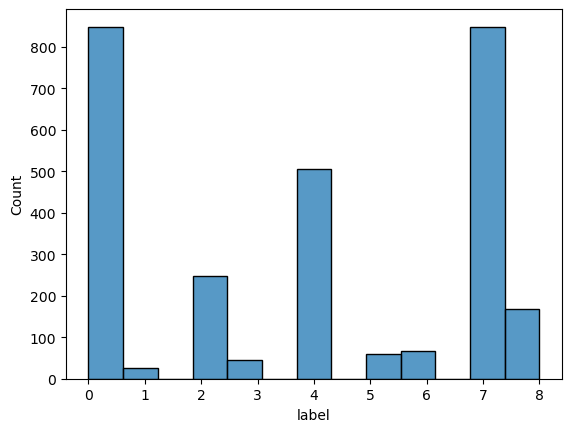

In [10]:
sns.histplot(df["label"])

In [11]:
X=df.drop(["label","previous_label",'after1','after4'],axis=1)
y=df['label']

In [12]:
X.shape

(2817, 4557)

In [13]:
y.shape

(2817,)

In [14]:
# from xgboost import XGBClassifier#XGBcalssifier
# xgbcl=XGBClassifier( eval_metric='logloss', random_state=10)
# xgbcl.fit(X_train,y_train)
# # filename = './xgb_model.sav'
# # xgbcl=joblib.load(filename)
# pred=xgbcl.predict(X_test)
# from sklearn import metrics #accuracy measure
# print(metrics.classification_report(pred,y_test))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(pred,y_test, normalize='true')
# sns.heatmap(conf,annot=True)

In [15]:
# from sklearn.ensemble import RandomForestClassifier #Random Forest
# rf=RandomForestClassifier(random_state=10)
# rf.fit(X_train,y_train)
# pred=rf.predict(X_test)

# print(metrics.classification_report(pred,y_test))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(pred,y_test, normalize='true')
# sns.heatmap(conf,annot=True)

In [16]:
# import joblib
# filename = './xgb_model.sav'
# joblib.dump(xgbcl, filename)

In [17]:
# from sklearn.svm import SVC
# svc=SVC()
# svc.fit(X_train,y_train)
# pred=svc.predict(X_test)

# print(metrics.classification_report(pred,y_test))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(pred,y_test, normalize='true')
# sns.heatmap(conf,annot=True)

In [18]:
# from sklearn.neighbors import KNeighborsClassifier,RadiusNeighborsClassifier
# knn = RadiusNeighborsClassifier(radius=175)
# knn.fit(X_train,y_train)
# pred=knn.predict(X_test)

# print(metrics.classification_report(pred,y_test))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(pred,y_test, normalize='true')
# sns.heatmap(conf,annot=True)

In [19]:
# from sklearn.linear_model import SGDClassifier
## sgd=SGDClassifier()loss='epsilon_insensitive'
# sgd.fit(X_train,y_train)
# pred=sgd.predict(X_test)

# print(metrics.classification_report(pred,y_test))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(pred,y_test, normalize='true')
# sns.heatmap(conf,annot=True)

In [20]:
from sklearn.feature_selection import SelectKBest,f_regression
# Applying SelectKBest class to extract top 15 best features
fs = SelectKBest(score_func=f_regression,k=15)
# Applying feature selection
fit = fs.fit(X,y)
features_score = pd.DataFrame(fit.scores_)
features = pd.DataFrame(X.columns)
feature_score = pd.concat([features,features_score],axis=1)
# Assigning column names
feature_score.columns = ["Input_Features","F_Score"]
print(feature_score.nlargest(300,columns="F_Score"))
# dfi.export(feature_score.nlargest(16,columns="F_Score"),'./image/fulltest/f_test.png')
# feature_score.nlargest(300,columns="F_Score")['Input_Features'].values

                                       Input_Features      F_Score
4429  movingright_shoulder right_wrist dy quantile25e  2232.801787
4404          movingright_shoulder right_wrist dx mae  2091.255925
4393       movingright_shoulder right_wrist dx var_ft  2091.255925
4408  movingright_shoulder right_wrist dx quantile25e  2080.020681
4414       movingright_shoulder right_wrist dy var_ft  2054.786084
...                                               ...          ...
4112       movingright_shoulder right_eye dx minerror  1200.548236
3988                    movingright_hip_x quantile25e  1197.255048
468                           right_shoulder_y sum_ft  1195.548073
462                          right_shoulder_y mean_ft  1195.548073
4148     movingright_shoulder left_ear dx quantile 75  1194.393739

[300 rows x 2 columns]


In [21]:
X_train=X#[feature_score.nlargest(300,columns="F_Score")['Input_Features'].values]
y_train=y
X_test=test.drop(["label","previous_label"],axis=1)
# X_test=X_test[feature_score.nlargest(300,columns="F_Score")['Input_Features'].values]
y_test=test['label']


In [22]:
from imblearn.over_sampling import SMOTE,RandomOverSampler
from imblearn.over_sampling import ADASYN
from imblearn.combine import SMOTEENN
from sklearn.ensemble import RandomForestClassifier #Random Forest
# try:
# oversampling the train dataset using SMOTE

sm = SMOTE()
all_feature_smote, all_label_smote = sm.fit_resample(X_train,y_train)
# rf=RandomForestClassifier(random_state=10,n_estimators=3000,criterion='log_loss')
# rf.fit(all_feature_smote, all_label_smote)
# # filename = './model/smote_rf_model.sav'
# # rf=joblib.load(filename)
# pred_rf=rf.predict(X_test)

# print(metrics.classification_report(pred_rf,y_test))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(pred_rf,y_test, normalize='true')
# sns.heatmap(conf,annot=True)



In [23]:
# filename = './model/smote_rf_model2.sav'
# joblib.dump(rf, filename)

In [24]:
a=[e for e in X_train if e not in X_test]
a

[]

              precision    recall  f1-score   support

           0       0.90      0.74      0.81        58
           1       0.00      0.00      0.00         2
           2       0.71      0.91      0.80        11
           3       0.25      0.50      0.33         2
           4       0.52      0.80      0.63        20
           5       1.00      0.60      0.75         5
           6       0.60      1.00      0.75         3
           7       0.96      0.75      0.84        32
           8       0.60      1.00      0.75         3

    accuracy                           0.76       136
   macro avg       0.62      0.70      0.63       136
weighted avg       0.81      0.76      0.77       136



/Users/khangphan/anaconda3/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/khangphan/anaconda3/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/Users/khangphan/anaconda3/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/Users/khangphan/anaconda3/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or

<Axes: >

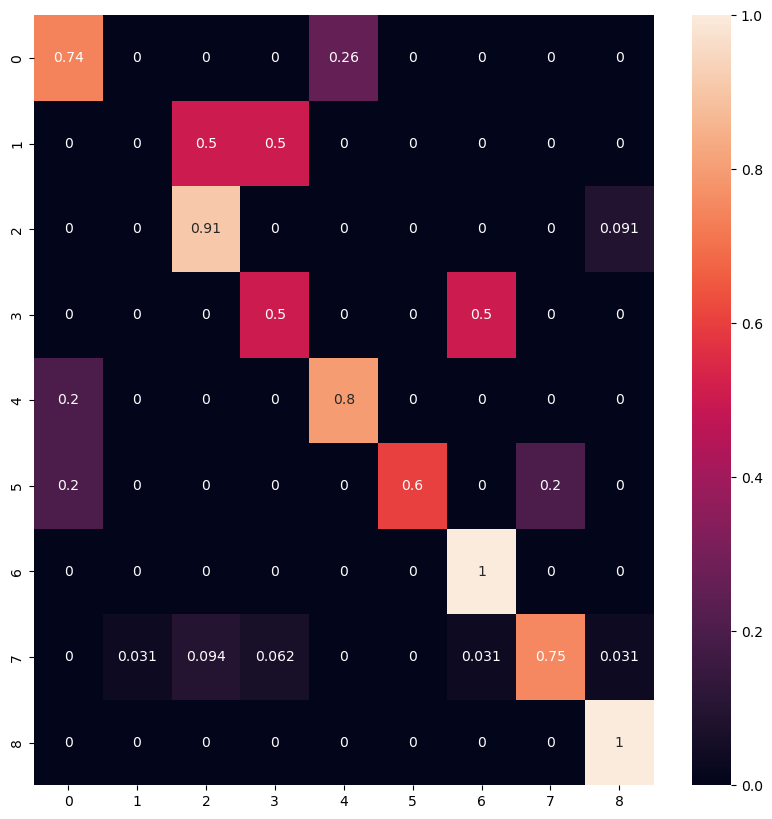

In [25]:
from xgboost import XGBClassifier#XGBcalssifier
from xgboost import callback
early_stop = callback.EarlyStopping(
    rounds=4, metric_name='mlogloss', save_best=True
)
try:
    filename = './model_window5/smote_xgb_model2.sav'
    xgbcl=joblib.load(filename)
    pred_xgb=xgbcl.predict(X_test)
except:
    xgbcl=XGBClassifier( eval_metric='mlogloss', random_state=10,callbacks=[early_stop])
    xgbcl.fit(all_feature_smote, all_label_smote,eval_set=[(X_test, y_test)])
    pred_xgb=xgbcl.predict(X_test)

from sklearn import metrics #accuracy measure
print(metrics.classification_report(pred_xgb,y_test))
ax,fig=plt.subplots(figsize=(10,10))
conf=metrics.confusion_matrix(pred_xgb,y_test, normalize='true')
sns.heatmap(conf,annot=True)

In [26]:
# X_train_with_predictions.shape

In [27]:
# X_train_with_predictions=df.drop(["label"],axis=1)
# y_train_with_predictions=df['label']
# X_test["previous_label"]=pred_xgb
# all_feature_smote_with_predictions, all_label_smote_with_predictions = sm.fit_resample(X_train_with_predictions,y_train_with_predictions)
# from xgboost import XGBClassifier#XGBcalssifier
# xgbcl=XGBClassifier( eval_metric='aucs‌', random_state=10)
# xgbcl.fit(all_feature_smote_with_predictions, all_label_smote_with_predictions)
# # filename = './smote_xgb_model_acc.sav'
# # xgbcl=joblib.load(filename)
# pred_xgb_with_predictions=xgbcl.predict(X_test)
# from sklearn import metrics #accuracy measure
# print(metrics.classification_report(pred_xgb_with_predictions,y_test))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(pred_xgb_with_predictions,y_test, normalize='true')
# sns.heatmap(conf,annot=True)

In [28]:
# rf_with_predictions=RandomForestClassifier(random_state=10,n_estimators=3000,criterion='log_loss')
# rf_with_predictions.fit(all_feature_smote_with_predictions, all_label_smote_with_predictions)
# # filename = './smote_xgb_model_acc.sav'
# # xgbcl=joblib.load(filename)
# pred_rf_with_predictions=rf_with_predictions.predict(X_test)
# from sklearn import metrics #accuracy measure
# print(metrics.classification_report(pred_rf_with_predictions,y_test))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(pred_rf_with_predictions,y_test, normalize='true')
# sns.heatmap(conf,annot=True)

In [29]:
filename = './model_window5/smote_xgb_model2.sav'
joblib.dump(xgbcl, filename)

['./model_window5/smote_xgb_model2.sav']

              precision    recall  f1-score   support

         0.0       0.96      0.72      0.82        64
         1.0       0.00      0.00      0.00         1
         2.0       0.71      0.71      0.71        14
         3.0       0.00      0.00      0.00         0
         4.0       0.48      0.88      0.62        17
         5.0       0.33      0.50      0.40         2
         6.0       0.40      1.00      0.57         2
         7.0       0.80      0.62      0.70        32
         8.0       0.80      1.00      0.89         4

    accuracy                           0.72       136
   macro avg       0.50      0.60      0.52       136
weighted avg       0.81      0.72      0.74       136



/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

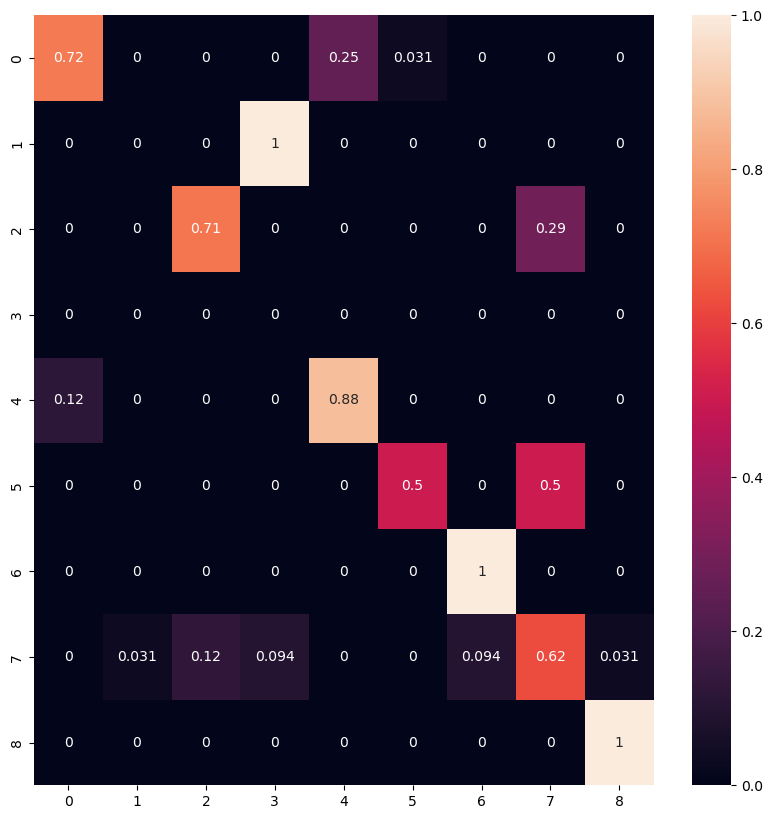

In [30]:
from sklearn.ensemble import HistGradientBoostingClassifier
HGBC=HistGradientBoostingClassifier(random_state=10)
# HGBC.fit(X_train,y_train)
try:
    filename = './model_window5/smote_HGBC_model2.sav'
    HGBC=joblib.load(filename)
    pred=HGBC.predict(X_test)
except:
    HGBC.fit(all_feature_smote, all_label_smote )
    pred=HGBC.predict(X_test)


print(metrics.classification_report(pred,y_test))
ax,fig=plt.subplots(figsize=(10,10))
conf=metrics.confusion_matrix(pred,y_test, normalize='true')
sns.heatmap(conf,annot=True)

In [31]:
filename = './model_window5/smote_HGBC_model2.sav'
joblib.dump(HGBC, filename)

['./model_window5/smote_HGBC_model2.sav']

In [32]:
# def predict0_4(df):
# #     print(df['label_pred'])
# #     print(df['label_pred'] in [1,2,3,5,6,7,8])
#     if df['previous_label'] in [1,2,3,5,6,7,8]:
#         return df['previous_label']
#     else:
# #         print(np.array(df.drop(["label","previous_label",'label_pred'])))
# # xgb_class0_4
#         return xgbcl.predict(np.array(df.drop(["label",'previous_label'
#                                     ])).reshape(1,-1)).view().item()

In [33]:
# from sklearn.ensemble import AdaBoostClassifier
# test['previous_label']=pred_xgb
# # test['previous_label']=list(pred_xgb).insert(0,0)
# df_class0_4=df[df['label'].isin([0,4])]
# X_train_class0_4=df_class0_4.drop(["label",'previous_label'],axis=1)
# y_train_class0_4=df_class0_4.label
# X_train_class0_4=np.array(X_train_class0_4)
# y_train_class0_4=np.array(y_train_class0_4)
# X_train_class0_4sm,y_train_class0_4sm = sm.fit_resample(X_train_class0_4,y_train_class0_4)
# xgb_class0_4=RandomForestClassifier(random_state=10,n_estimators=30,criterion='gini')#XGBClassifier( eval_metric='logloss', random_state=10)
# try:
#     print('sm')
# #     xgb_class0_4.fit(X_train_class0_4sm, y_train_class0_4sm)
# except:
#     print('no sm')
# #     xgb_class0_4.fit(X_train_class0_4, y_train_class0_4)
# test['label_pred']=test.apply(lambda x:predict0_4(x),axis=1)

# # test_class0_4=test[(test['label_pred'].isin([0,4]))&(test['label'].isin([0,4]))]
# # X_test_class0_4=test_class0_4.drop(["label","previous_label",'label_pred'],axis=1)
# # y_test_class0_4=test_class0_4.label
# # # X_test_class0_4=np.array(X_test_class0_4)
# # # y_test_class0_4=np.array(y_test_class0_4)

# # pred_class0_4=xgb_class0_4.predict(X_test_class0_4)
# print(metrics.classification_report(test['label'],test['label_pred']))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(test['label'],test['label_pred'], normalize='true')
# sns.heatmap(conf,annot=True)

In [34]:
test['label1']=pred
# turn2
test['previous_label']=test['label1']
test['second_turn']=test['previous_label'].diff()
test['second_turn']=test.apply(lambda test:second_turn(test['label'],test['second_turn']),axis=1)
turn=list(test['second_turn'])
turn_2=[]

if (test['label'][0].item()>0): 
    count=2
else: 
    count=1
for i in range(len(turn)):

    if turn[i]<-3:
        count-=1
    if count<=0:
        turn_2.append(1) 
    else:
        turn_2.append(0) 
test['turn']=turn
test['second_turn']=turn_2
            
print(list(test['label'])[0])
def fturn():
    if list(test['label'])[0]>0: 
        after0=1
    else: after0=1
    return after0
after0=fturn()
sturn=True
after1=[]
after4=[]
for i in range(len(test['label'])):

    if (list(test['label'])[i]==1)|(list(test['label'])[i]==2)|(list(test['label'])[i]==3):
        after0-=1
    if (list(test['second_turn'])[i]>0) and sturn==True:
        after0=fturn()
        sturn=False
    if after0<=0:
#         print(after0)
        after1.append(1) 
    else:
        after1.append(0) 
after0=fturn()
sturn=True
for i in range(len(test['label'])):
    if (list(test['label'])[i]==4)|(list(test['label'])[i]==5)|(list(test['label'])[i]==6):
        after0-=1
    if (list(test['second_turn'])[i]>0) and sturn==True:
        after0=fturn()
        sturn=False
    if after0<=0:
#         print(after0)
        after4.append(1) 
    else:
        after4.append(0) 


test['after1']=after1
test['after4']=after4
test=test.drop(['second_turn','turn'],axis=1)

8


In [35]:
X_test_a=test.drop(["label","previous_label",'label1'],axis=1)
# X_test=X_test[feature_score.nlargest(300,columns="F_Score")['Input_Features'].values]
y_test_a=test['label']

X=df.drop(["label","previous_label"],axis=1)
y=df['label']
X_train_a=X#[feature_score.nlargest(300,columns="F_Score")['Input_Features'].values]
y_train_a=y

all_feature_smote_a, all_label_smote_a = sm.fit_resample(X_train_a,y_train_a)

              precision    recall  f1-score   support

         0.0       1.00      0.72      0.83        67
         1.0       1.00      0.33      0.50         3
         2.0       0.71      1.00      0.83        10
         3.0       0.00      0.00      0.00         0
         4.0       0.45      0.93      0.61        15
         5.0       0.33      0.50      0.40         2
         6.0       0.40      0.67      0.50         3
         7.0       0.92      0.72      0.81        32
         8.0       0.60      0.75      0.67         4

    accuracy                           0.75       136
   macro avg       0.60      0.62      0.57       136
weighted avg       0.86      0.75      0.78       136



/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

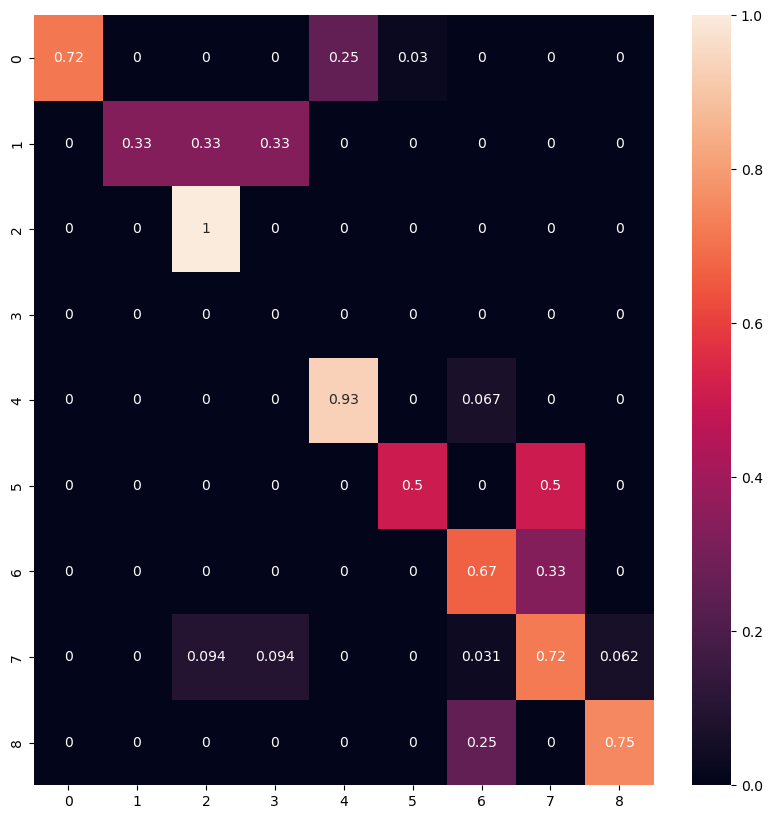

In [36]:
try:
    filename = './model_window5/smote_HGBC_model_after.sav'
    HGBC=joblib.load(filename)
    pred_a=HGBC.predict(X_test_a)
except:
    print('learning')
    HGBC=HistGradientBoostingClassifier(random_state=10)
    HGBC.fit(all_feature_smote_a, all_label_smote_a )
    pred_a=HGBC.predict(X_test_a)


print(metrics.classification_report(pred_a,y_test))
ax,fig=plt.subplots(figsize=(10,10))
conf=metrics.confusion_matrix(pred_a,y_test, normalize='true')
sns.heatmap(conf,annot=True)

In [37]:
# XGB=RandomForestClassifier(random_state=10)
# XGB.fit(all_feature_smote_a, all_label_smote_a)

# pred_b=XGB.predict(X_test_a)

# print(metrics.classification_report(pred_b,y_test))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(pred_b,y_test, normalize='true')
# sns.heatmap(conf,annot=True)

In [38]:
filename = './model_window5/smote_HGBC_model_after.sav'
joblib.dump(HGBC, filename)

['./model_window5/smote_HGBC_model_after.sav']

              precision    recall  f1-score   support

           0       0.98      0.75      0.85        63
           1       1.00      0.33      0.50         3
           2       0.71      0.77      0.74        13
           3       0.00      0.00      0.00         0
           4       0.48      1.00      0.65        15
           5       1.00      0.60      0.75         5
           6       0.20      0.50      0.29         2
           7       0.84      0.66      0.74        32
           8       0.60      1.00      0.75         3

    accuracy                           0.74       136
   macro avg       0.65      0.62      0.58       136
weighted avg       0.85      0.74      0.77       136



/Users/khangphan/anaconda3/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/khangphan/anaconda3/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/Users/khangphan/anaconda3/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/Users/khangphan/anaconda3/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or

<Axes: >

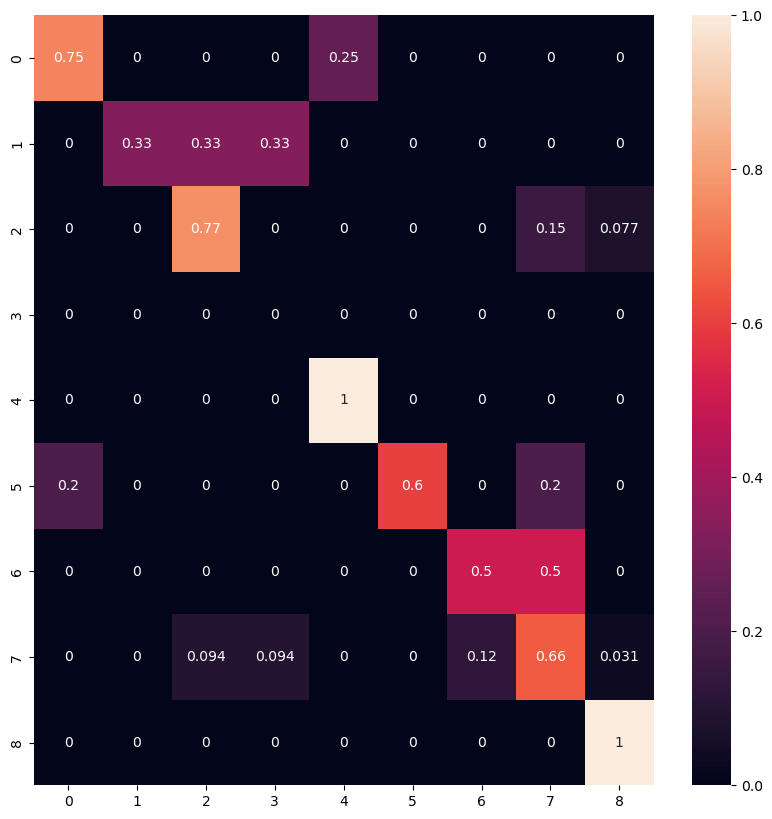

In [39]:
# import six
# import sys
# sys.modules['sklearn.externals.six'] = six
# from seqlearn.perceptron import StructuredPerceptron

try:
    filename = './model_window5/smote_xgb_model_after.sav'
    xgbafter=joblib.load(filename)
    pred_a=xgbafter.predict(X_test_a)
except:
    print('learning')
    xgbafter=XGBClassifier( eval_metric='mlogloss', random_state=10)
    xgbafter.fit(all_feature_smote_a, all_label_smote_a )
    pred_a=xgbafter.predict(X_test_a)
    
print(metrics.classification_report(pred_a,y_test))
ax,fig=plt.subplots(figsize=(10,10))
conf=metrics.confusion_matrix(pred_a,y_test, normalize='true')
sns.heatmap(conf,annot=True)

In [40]:
filename = './model_window5/smote_xgb_model_after.sav'
joblib.dump(xgbafter, filename)

['./model_window5/smote_xgb_model_after.sav']

              precision    recall  f1-score   support

           0       0.73      0.90      0.80        48
           1       1.00      1.00      1.00         1
           2       1.00      0.57      0.73        14
           3       0.00      0.00      0.00         4
           4       0.77      0.55      0.64        31
           5       0.67      0.67      0.67         3
           6       0.00      0.00      0.00         5
           7       0.57      0.84      0.68        25
           8       0.75      0.60      0.67         5

    accuracy                           0.70       136
   macro avg       0.61      0.57      0.58       136
weighted avg       0.69      0.70      0.68       136



<Axes: >

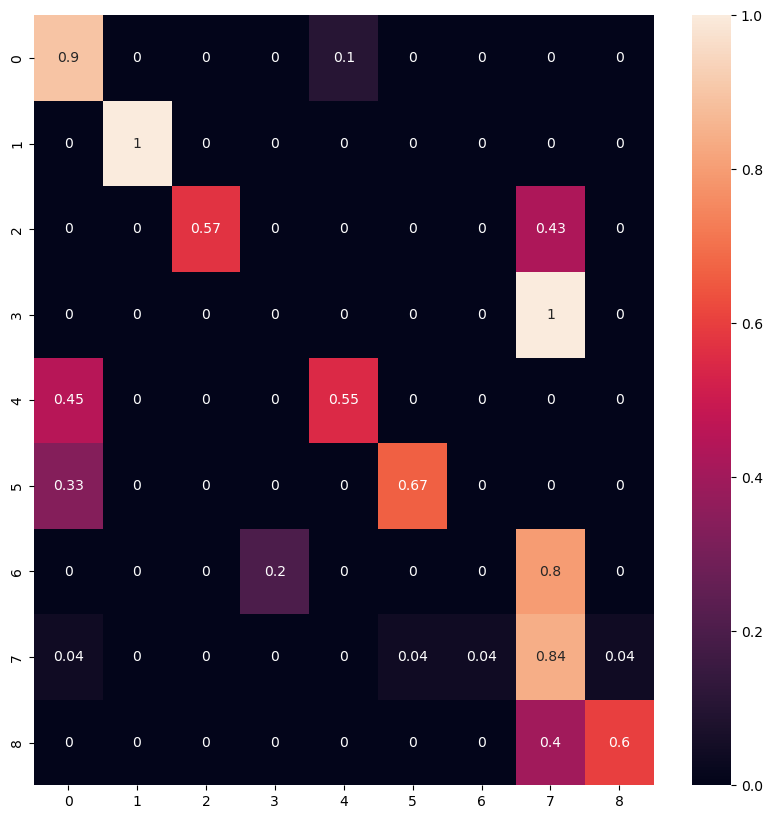

In [41]:
from sklearn.ensemble import GradientBoostingClassifier
# import six
# import sys
# sys.modules['sklearn.externals.six'] = six
# from seqlearn.perceptron import StructuredPerceptron

try:
    filename = './model_window5/smote_ada_model_after.sav'
    ada=joblib.load(filename)
    pred_a=ada.predict(X_test_a)
except:
    
    print('learning')
    ada=GradientBoostingClassifier(n_estimators=200,max_features=9)
    ada.fit(all_feature_smote_a, all_label_smote_a )
    pred_a=ada.predict(X_test_a)    
print(metrics.classification_report(y_test,pred_a))
ax,fig=plt.subplots(figsize=(10,10))
conf=metrics.confusion_matrix(y_test,pred_a, normalize='true')
sns.heatmap(conf,annot=True)

In [42]:
filename = './model_window5/smote_ada_model_after.sav'
joblib.dump(ada, filename)

['./model_window5/smote_ada_model_after.sav']

learning


/Users/khangphan/anaconda3/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classif

              precision    recall  f1-score   support

           0       0.78      0.94      0.85        48
           1       0.50      1.00      0.67         1
           2       1.00      0.57      0.73        14
           3       0.00      0.00      0.00         4
           4       0.88      0.68      0.76        31
           5       1.00      0.33      0.50         3
           6       1.00      0.40      0.57         5
           7       0.63      0.96      0.76        25
           8       1.00      0.60      0.75         5

    accuracy                           0.77       136
   macro avg       0.75      0.61      0.62       136
weighted avg       0.79      0.77      0.75       136



<Axes: >

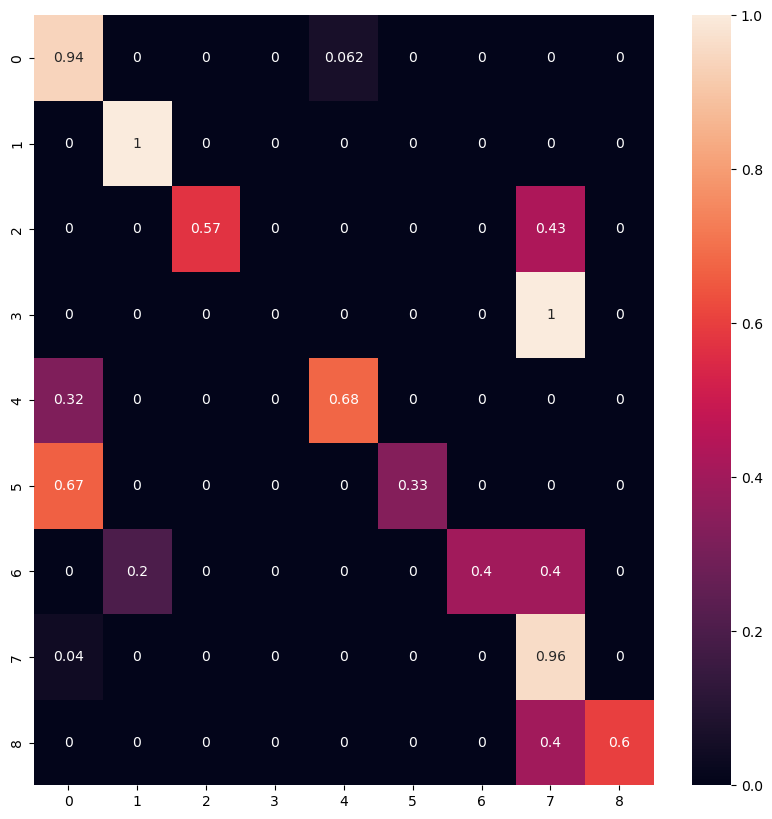

In [46]:
from sklearn.model_selection import GridSearchCV
filename = './model_window5/smote_grid_model_after.sav'
try:
    clf=joblib.load(filename)
    pred_a=clf.predict(X_test_a)  
except:

    parameters = {
        "loss":[ 'log_loss'],
        "learning_rate": [ 0.1, 0.5, 0.2,0.05,0.01],#0.01, 0.025, 0.05, 0.075,
#         "min_samples_split": np.linspace(0.1, 0.5, 12),
#         "min_samples_leaf": np.linspace(0.1, 0.5, 12),
        "max_depth":[8,50],
        "max_features":["log2","sqrt"],
        "criterion": ["friedman_mse",  'squared_error']
#         "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
#         "n_estimators":[10]
        }
    clf = GridSearchCV(GradientBoostingClassifier(), parameters, cv=4, n_jobs=-1)
    print('learning')
    # ada=GradientBoostingClassifier(n_estimators=200,max_features=9)
    clf.fit(all_feature_smote_a, all_label_smote_a )
    pred_a=clf.predict(X_test_a)    
print(metrics.classification_report(y_test,pred_a))
ax,fig=plt.subplots(figsize=(10,10))
conf=metrics.confusion_matrix(y_test,pred_a, normalize='true')
sns.heatmap(conf,annot=True)

In [47]:
filename = './model_window5/smote_grid_model_after.sav'
joblib.dump(ada, filename)

['./model_window5/smote_grid_model_after.sav']

In [ ]:
# from sklearn.ensemble import AdaBoostClassifier
# ada=AdaBoostClassifier(random_state=10)
# ada.fit(X_train,y_train)
# pred=ada.predict(X_test)

# print(metrics.classification_report(pred,y_test))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(pred,y_test, normalize='true')
# sns.heatmap(conf,annot=True)

In [ ]:
# from catboost import CatBoostClassifier
# # catboost=CatBoostClassifier()
# # catboost.fit(X_train,y_train)
# filename = './catboost_model.sav'
# catboost=joblib.load(filename)
# pred=catboost.predict(X_test)

# print(metrics.classification_report(pred,y_test))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(pred,y_test, normalize='true')
# sns.heatmap(conf,annot=True)

In [ ]:
# filename = './catboost_model.sav'
# joblib.dump(catboost, filename)

In [ ]:
# from keras.layers import TimeDistributed
# # # trainX=np.array(X_train)
# # testX=np.array(X_test)
# # # trainY=np.array(y_train)
# # testY=np.array(y_test)
# # trainX=np.array(all_feature_smote)
# # trainY=np.array(all_label_smote)
# df_class0_4=df[df['label'].isin([0,4])]
# X_train_class0_4=df_class0_4.drop(["label","previous_label"],axis=1)
# y_train_class0_4=df_class0_4.label
# X_train_class0_4sm,y_train_class0_4sm = sm.fit_resample(X_train_class0_4,y_train_class0_4)
# trainX=np.array(X_train_class0_4sm)
# trainY=np.array(y_train_class0_4sm)

# test_class0_4=test[test['label'].isin([0,4])]
# X_test_class0_4=test_class0_4.drop(["label","previous_label",'label_pred'],axis=1)
# y_test_class0_4=test_class0_4.label
# testX=np.array(X_test_class0_4)
# testY=np.array(y_test_class0_4)

# # # testY = tf.keras.utils.to_categorical(testY)
# # # trainY = tf.keras.utils.to_categorical(trainY)
# # trainX = np.expand_dims(trainX, 2)
# # testX = np.expand_dims(testX, 2)

# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# from tensorflow.keras import models
# model = models.Sequential()
# model.add(layers.Input(shape=(len(trainX[1]), 1)))
# model.add(layers.Conv1D(64,64, activation='relu'))
# # model.add(LSTM(units=3, return_sequences=True))
# # model.add(LSTM(units=64, return_sequences=True))
# model.add(layers.MaxPooling1D(4))
# model.add(layers.Conv1D(32, 32, activation='relu'))
# model.add(layers.MaxPooling1D(4))
# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Conv1D(16, 16, activation='relu'))
# model.add(LSTM(units=64, return_sequences=True))
# # model.add(LSTM(units=32, return_sequences=True))
# model.add(LSTM(units=16, return_sequences=True))
# model.add(Dropout(0.5))

# model.add(layers.Flatten())
# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dense(32, activation='relu'))
# model.add(layers.Dense(9,activation='softmax'))
# mcp_save = ModelCheckpoint('DL_model.hdf5', save_best_only=True, monitor='val_loss', mode='min')
# model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])

# history = model.fit(trainX,trainY, epochs=100, 
#                     validation_data=(testX,testY), 
#                     callbacks=[early_stopping,mcp_save])

In [ ]:
# plt.clf()
# plt.plot(history.history['loss'], label='loss')
# plt.plot(history.history['val_loss'], label = 'val_loss')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')

# plt.legend(loc='lower right')

In [ ]:
# pred=model.predict(testX)
# pred=np.argmax(pred,axis=1)
# print(metrics.classification_report(pred,testY))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(pred,testY, normalize='true')
# sns.heatmap(conf,annot=True)

In [ ]:
# model_rnn = Sequential()
# model_rnn.add(LSTM(units=64, return_sequences=True, input_shape=(len(trainX[1]), 1)))
# model_rnn.add(Conv1D(128, 6))
# model_rnn.add(LSTM(units = 64, return_sequences = True))
# model_rnn.add(Dropout(0.2))
# model_rnn.add(Conv1D(128, 3))
# model_rnn.add(LSTM(units = 64, return_sequences = True))

# model_rnn.add(Dropout(0.2))
# model_rnn.add(LSTM(units = 64))

# model_rnn.add(Dense(units = 128))
# model_rnn.add(Dense(units = 64))

# model_rnn.add(Dense(units = 9, activation="softmax")) #4 as the output classes

# # Define the BRNN model with LSTM layers
# model_brnn = keras.Sequential([
#     layers.Bidirectional(layers.LSTM(64, activation='relu', return_sequences=True), 
#                          input_shape=(len(trainX[1]), 1)),
# #     layers.Bidirectional(layers.LSTM(64, activation='relu')),
# #     layers.Bidirectional(layers.LSTM(32, activation='relu')),
#     layers.Bidirectional(layers.LSTM(16, activation='relu')),
    
#     layers.Dense(9, activation='softmax')
# ])

In [ ]:
# from tensorflow.keras.callbacks import EarlyStopping

# # Compile the RNN model
# model_rnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# # Compile the BRNN model
# model_brnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# # Define early stopping
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# # Train the RNN model with early stopping

# ## model_rnn.fit(all_feature, all_label, epochs=100, batch_size=500, validation_data=(X_vad, y_vad), callbacks=[early_stopping])

# # Train the BRNN model with early stopping

# model_brnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# # history_brnn=model_brnn.fit(trainX,trainY, epochs=10, batch_size=500,
# #                             validation_data=(testX,testY), callbacks=[early_stopping])
# # , callbacks=[early_stopping]

In [ ]:
# history_rnn=model_rnn.fit(trainX,trainY, epochs=20,
#                             validation_data=(testX,testY), callbacks=[early_stopping])


In [ ]:
len(all_label_smote)

In [ ]:
# import scipy
# pred_aa=pd.Series(pred_a)
# pred_aa=pred_aa.rolling(3, min_periods=1).apply(scipy.stats.mode)
# pred_aa=pred_aa.apply(np.ceil)
# pred_aa=np.array(pred_aa)
# print(metrics.classification_report(pred_aa,y_test))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(pred_aa,y_test, normalize='true')
# sns.heatmap(conf,annot=True)

In [48]:
def output_xgb(ID,out):
    warnings.simplefilter('ignore')
    test=pd.read_csv(f'./test_set_df_acc_window5/{ID}')
    X_test=test.drop(["label","previous_label"],axis=1)
#     X_test=X_test[feature_score.nlargest(300,columns="F_Score")['Input_Features'].values]
    y_test=test['label']
    filename = './model_window5/smote_xgb_model2.sav'
    xgbcl=joblib.load(filename)
    # xgbcl=joblib.load(filename)
    pred=xgbcl.predict(X_test)
    
    test['label1']=pred
    # turn2
    test['previous_label']=test['label1']
    test['second_turn']=test['previous_label'].diff()
    test['second_turn']=test.apply(lambda test:second_turn(test['label'],test['second_turn']),axis=1)
    turn=list(test['second_turn'])
    turn_2=[]

    if (test['label'][0].item()>0): 
        count=2
    else: 
        count=1
    for i in range(len(turn)):

        if turn[i]<-3:
            count-=1
        if count<=0:
            turn_2.append(1) 
        else:
            turn_2.append(0) 
    test['turn']=turn
    test['second_turn']=turn_2

    print(list(test['label'])[0])
    def fturn():
        if list(test['label'])[0]>0: 
            after0=1
        else: after0=1
        return after0
    after0=fturn()
    sturn=True
    after1=[]
    for i in range(len(test['label'])):

        if (list(test['label'])[i]==1)|(list(test['label'])[i]==2)|(list(test['label'])[i]==3):
            after0-=1
        if (list(test['second_turn'])[i]>0) and sturn==True:
            after0=fturn()
            sturn=False
        if after0<=0:
    #         print(after0)
            after1.append(1) 
        else:
            after1.append(0) 
    test['after1']=after1
    after4=[]
    after0=fturn()
    sturn=True
    for i in range(len(test['label'])):
        if (list(test['label'])[i]==4)|(list(test['label'])[i]==5)|(list(test['label'])[i]==6):
            after0-=1
        if (list(test['second_turn'])[i]>0) and sturn==True:
            after0=fturn()
            sturn=False
        if after0<=0:
    #         print(after0)
            after4.append(1) 
        else:
            after4.append(0) 

    test['after4']=after4
    test=test.drop(['second_turn','turn'],axis=1)
    X_test_a=test.drop(["label","previous_label",'label1'],axis=1)
    # X_test=X_test[feature_score.nlargest(300,columns="F_Score")['Input_Features'].values]
    y_test_a=test['label']
    filename = './model_window5/smote_HGBC_model_after.sav'
    HGBC=joblib.load( filename)
    pred=HGBC.predict(X_test_a)
    acc= metrics.accuracy_score(pred,y_test)
    f1s=metrics.f1_score(y_test,pred,average='weighted')
    f1=metrics.f1_score(y_test,pred,average=None,labels=range(9),zero_division= np.nan)
    f1s0=f1[0]
    f1s1=f1[1]
    f1s2=f1[2]
    f1s3=f1[3]
    f1s4=f1[4]
    f1s5=f1[5]
    f1s6=f1[6]
    f1s7=f1[7]
    f1s8=f1[8]
    ax,fig=plt.subplots(figsize=(10,10))
    conf=metrics.confusion_matrix(y_test,pred,labels=[i for i in range(9)]
                                  , normalize='true')
    sns.heatmap(conf,annot=True)
#     print(ID)
#     print(np.unique(pred))
#     print(np.unique(y_test))
#     plt.savefig(f"./image/xgb_gan_window1/confusion_matrix_{ID[:5]}.png")
    return out.append([ID[:5],acc,f1s,f1s0,f1s1,f1s2,f1s3,f1s4,f1s5,f1s6,f1s7,f1s8])

8
8
8
8
8
8
8
8
8
8
8
8


,ID,accuracy,weighted avg F1-score,F1_score class 0,F1_score class 1,F1_score class 2,F1_score class 3,F1_score class 4,F1_score class 5,F1_score class 6,F1_score class 7,F1_score class 8
0,S08T1,0.735294,0.709841,0.814159,0.500000,0.833333,NaN,0.583333,0.400000,0.500000,0.807018,0.666667
1,S08T2,0.685714,0.647746,0.769231,NaN,0.812500,NaN,0.553191,NaN,0.400000,0.745763,0.363636
2,N11T1,0.902439,0.891974,0.945455,NaN,0.888889,1.000000,0.869565,NaN,NaN,0.915254,0.833333
3,N11T2,0.862500,0.857990,0.851064,NaN,1.000000,NaN,0.615385,NaN,1.000000,1.000000,0.888889
4,N06T1,0.645161,0.633073,0.610526,NaN,0.736842,NaN,0.560000,NaN,NaN,0.666667,0.875000
5,S02T2,0.727273,0.729035,0.914286,NaN,0.320000,NaN,0.810811,0.545455,0.500000,0.830189,0.375000
6,N06T2,0.746154,0.726497,0.740741,NaN,0.588235,0.800000,0.606061,NaN,0.857143,0.869565,0.636364
7,S02T1,0.676471,0.648792,0.807692,0.666667,0.645161,0.142857,0.631579,1.000000,0.250000,0.727273,0.400000
8,N02T2,0.805556,0.774350,0.814815,NaN,0.857143,NaN,0.533333,NaN,1.000000,0.953846,0.875000
9,N02T1,0.826087,0.813736,0.790698,NaN,0.923077,NaN,0.555556,NaN,1.000000,0.953846,1.000000


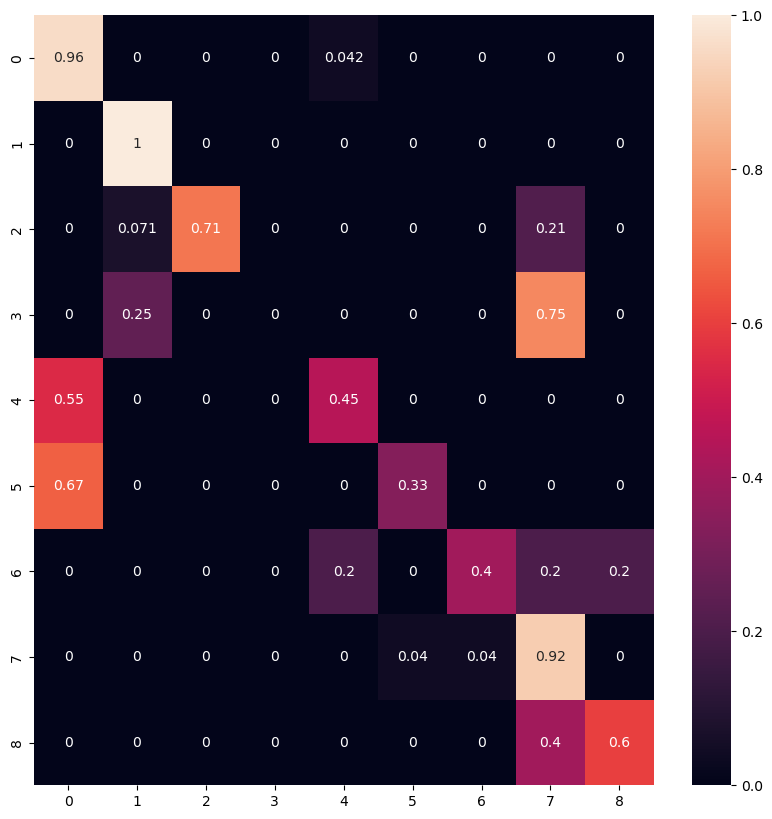

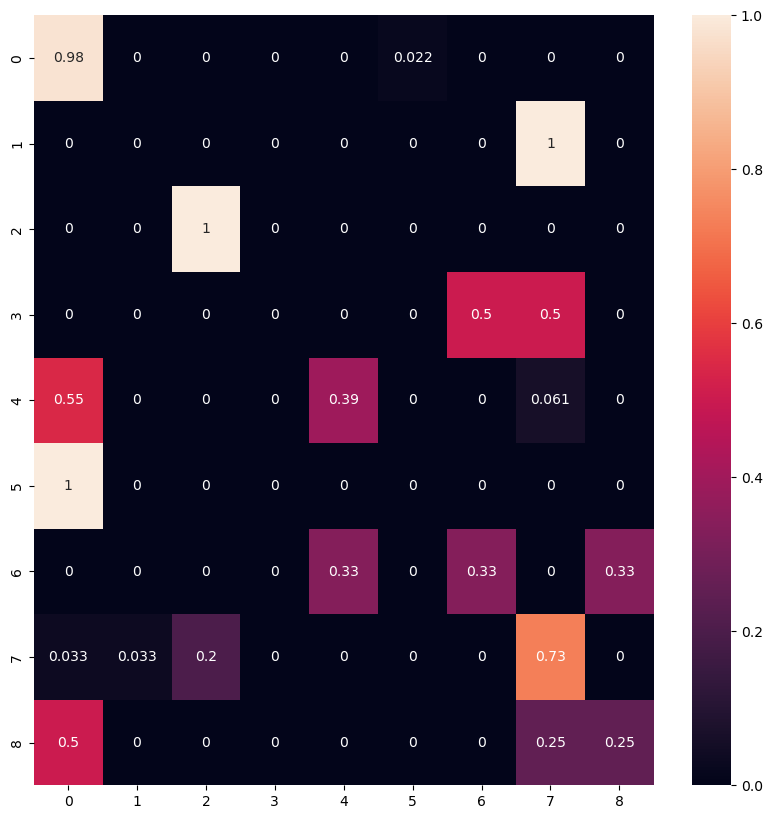

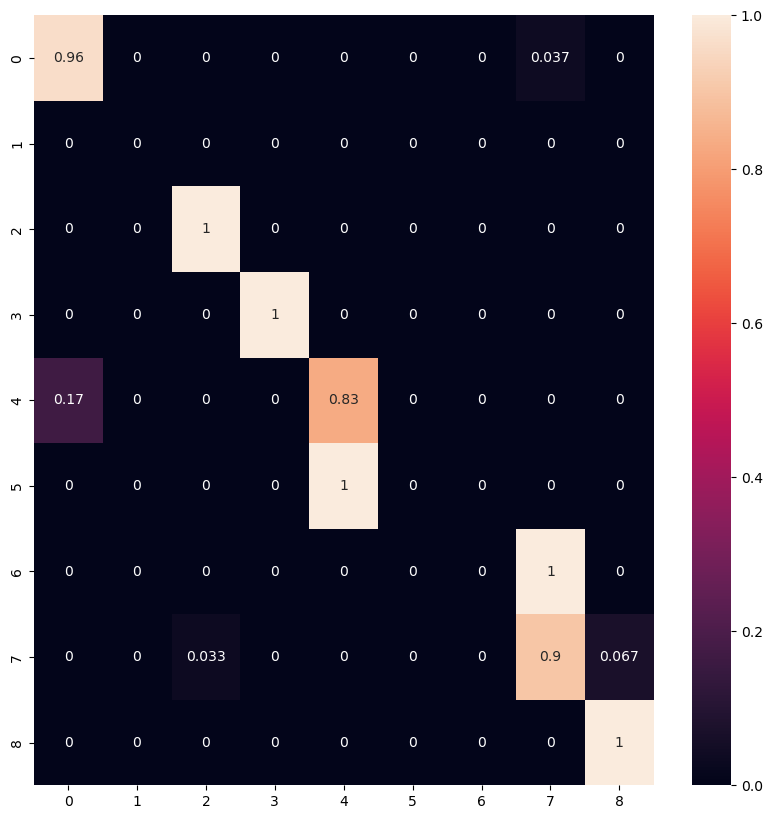

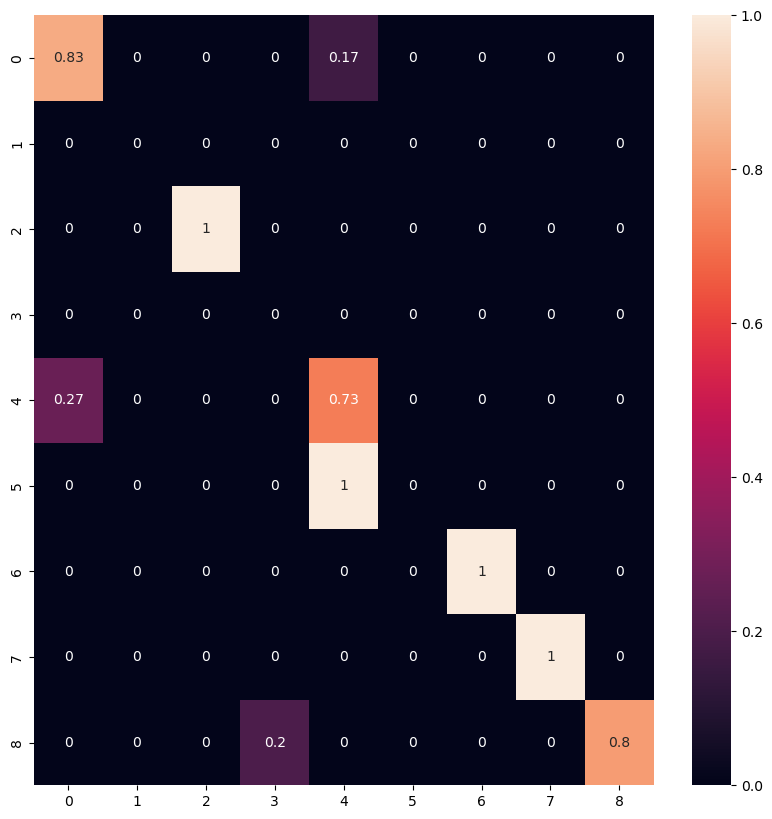

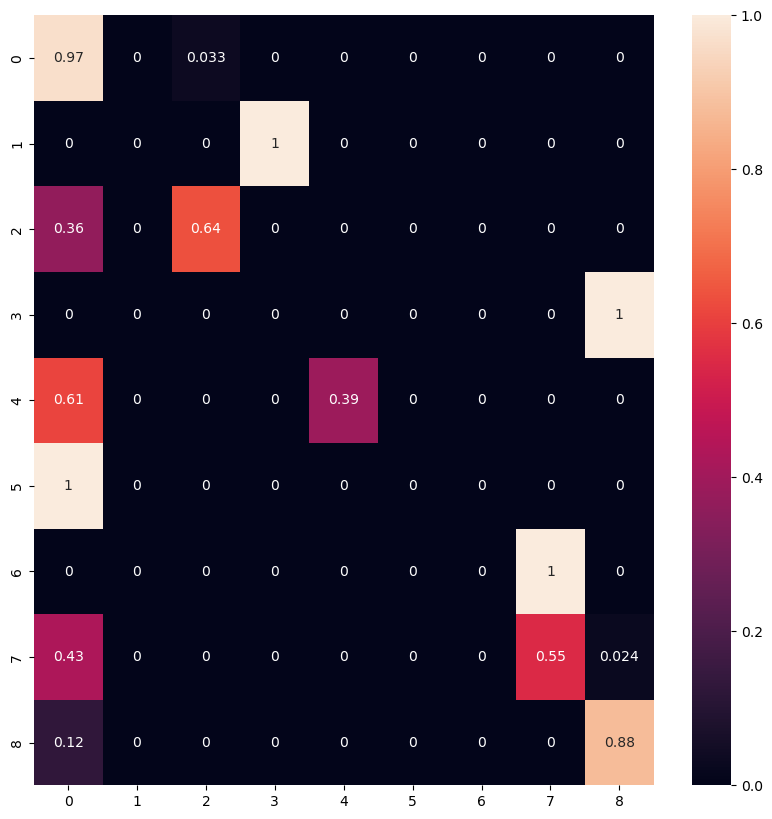

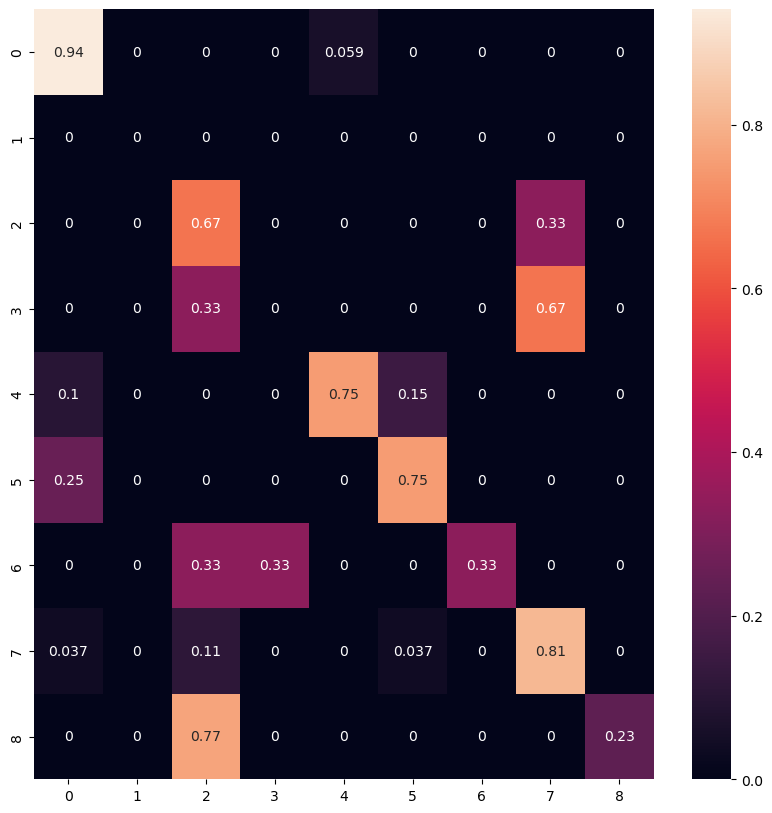

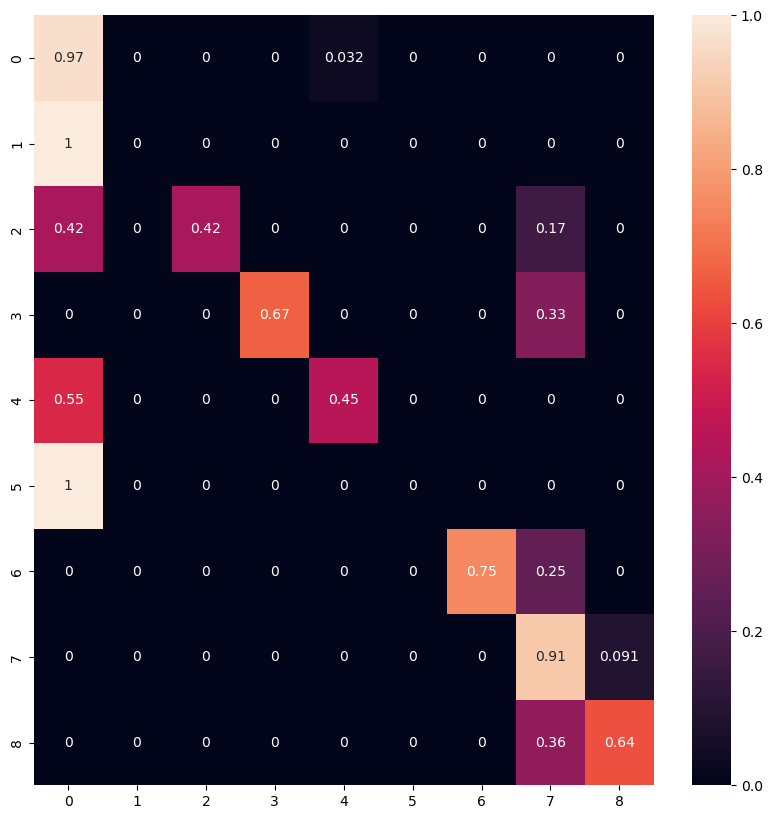

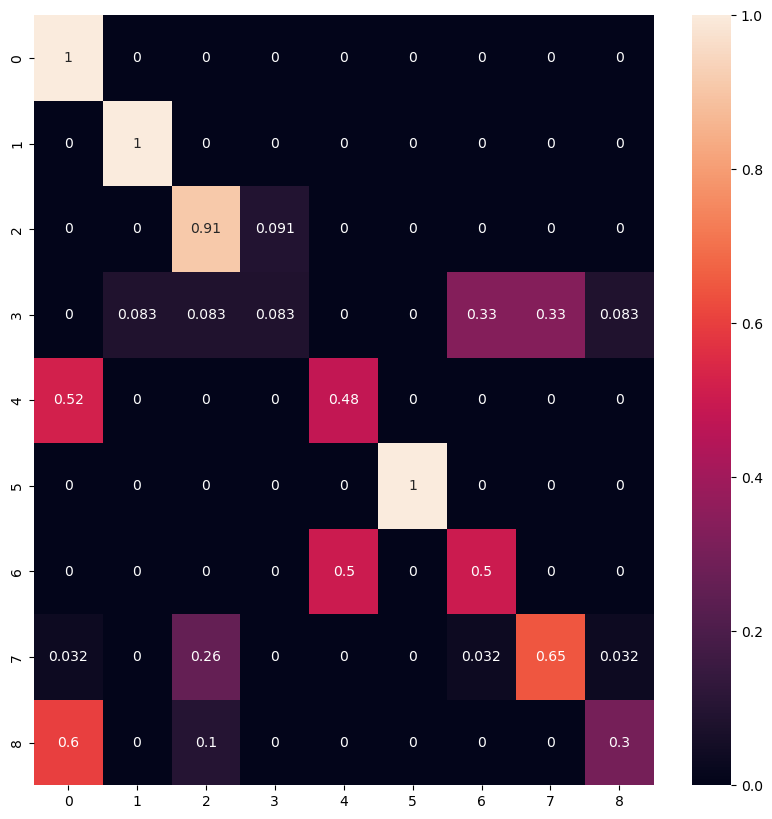

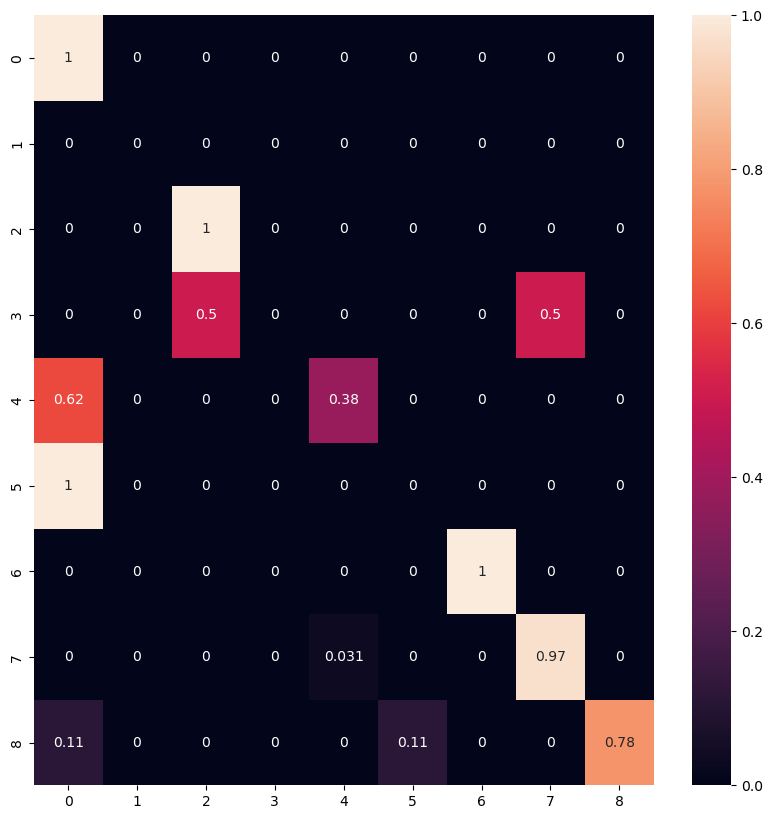

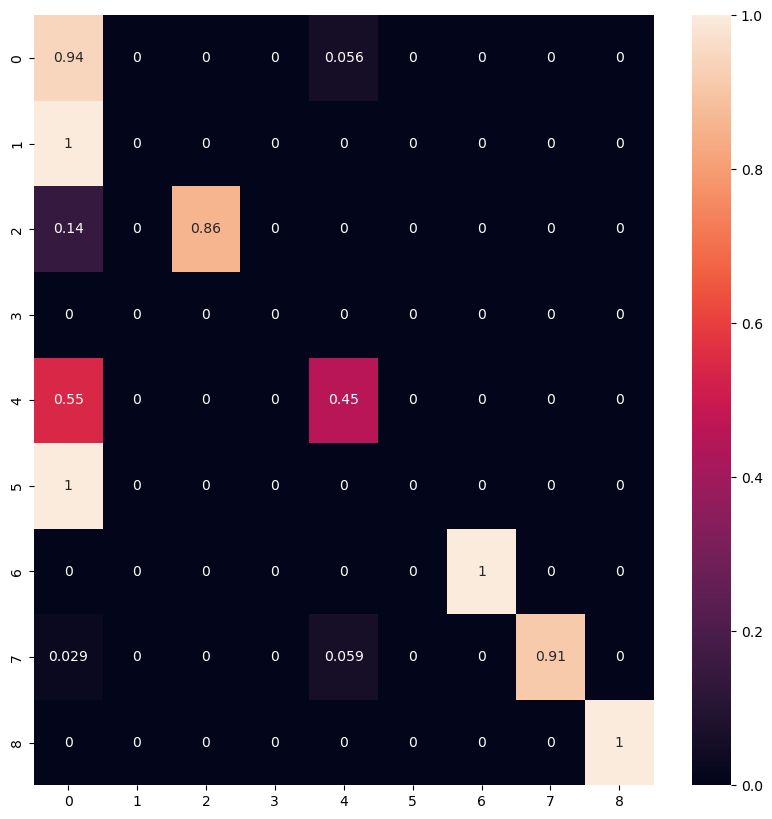

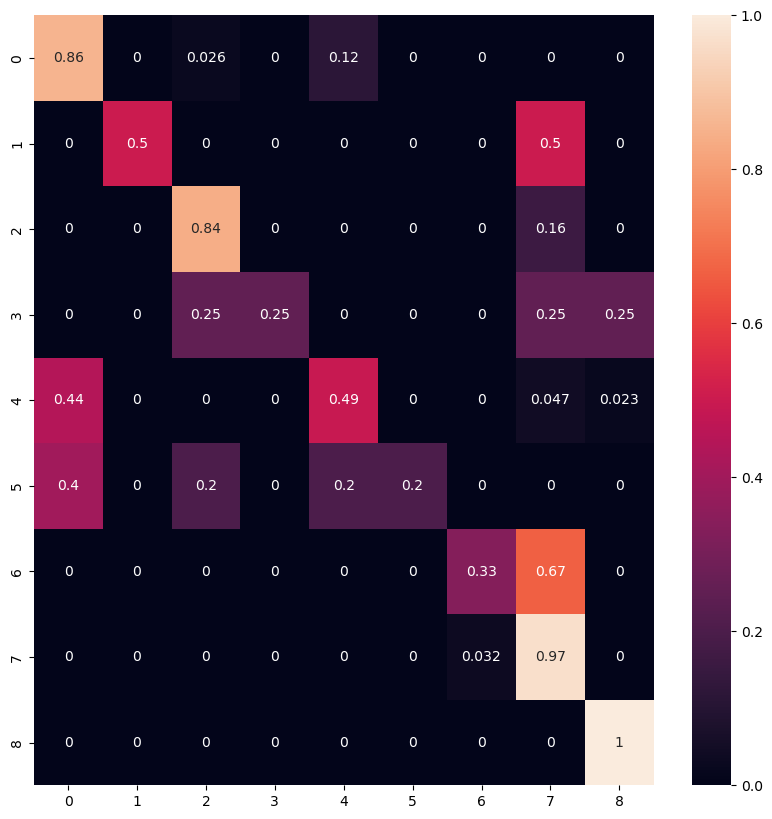

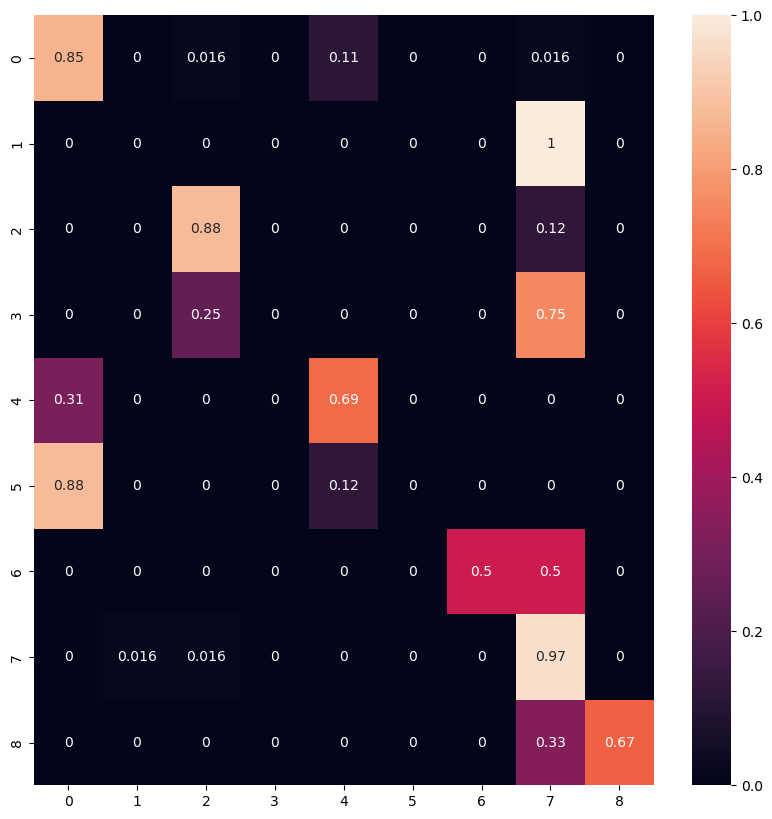

In [49]:
test_set=os.listdir('./test_set_df_acc_window5')
out_xgb=[]
for ID in test_set:
    if ID.endswith(".csv"):
        output_xgb(ID,out_xgb)
out_df_xgb=pd.DataFrame(out_xgb,columns=['ID','accuracy','weighted avg F1-score',
                                       'F1_score class 0',
                                      'F1_score class 1',
                                      'F1_score class 2',
                                      'F1_score class 3',
                                      'F1_score class 4',
                                      'F1_score class 5',
                                      'F1_score class 6',
                                      'F1_score class 7',
                                      'F1_score class 8'])

out_df_xgb

In [50]:
test_set=os.listdir('./test_set_df')
test_set

['.DS_Store',
 'S08T1.csv',
 'S08T2.csv',
 'N11T1.csv',
 'N11T2.csv',
 'N06T1.csv',
 'S02T2.csv',
 'N06T2.csv',
 'S02T1.csv',
 'N02T2.csv',
 'N02T1.csv',
 'S03T1.csv',
 'S03T2.csv']

In [51]:
def output_rf(ID,out):
    test=pd.read_csv(f'./test_set_df_acc_window5/{ID}')
    X_test=test.drop(["label","previous_label"],axis=1)
#     X_test=X_test[feature_score.nlargest(300,columns="F_Score")['Input_Features'].values]
    y_test=test['label']
    filename = './model_window5/smote_HGBC_model2.sav'
    xgbcl=joblib.load(filename)
    # xgbcl=joblib.load(filename)
    pred=xgbcl.predict(X_test)
    
    test['label1']=pred
    # turn2
    test['previous_label']=test['label1']
    test['second_turn']=test['previous_label'].diff()
    test['second_turn']=test.apply(lambda test:second_turn(test['label'],test['second_turn']),axis=1)
    turn=list(test['second_turn'])
    turn_2=[]

    if (test['label'][0].item()>0): 
        count=2
    else: 
        count=1
    for i in range(len(turn)):

        if turn[i]<-3:
            count-=1
        if count<=0:
            turn_2.append(1) 
        else:
            turn_2.append(0) 
    test['turn']=turn
    test['second_turn']=turn_2

    print(list(test['label'])[0])
    def fturn():
        if list(test['label'])[0]>0: 
            after0=1
        else: after0=1
        return after0
    after0=fturn()
    sturn=True
    after1=[]
    after4=[]
    for i in range(len(test['label'])):

        if (list(test['label'])[i]==1)|(list(test['label'])[i]==2)|(list(test['label'])[i]==3):
            after0-=1
        if (list(test['second_turn'])[i]>0) and sturn==True:
            after0=fturn()
            sturn=False
        if after0<=0:
    #         print(after0)
            after1.append(1) 
        else:
            after1.append(0) 
    test['after1']=after1
    after0=fturn()
    sturn=True
    for i in range(len(test['label'])):
        if (list(test['label'])[i]==4)|(list(test['label'])[i]==5)|(list(test['label'])[i]==6):
            after0-=1
        if (list(test['second_turn'])[i]>0) and sturn==True:
            after0=fturn()
            sturn=False
        if after0<=0:
    #         print(after0)
            after4.append(1) 
        else:
            after4.append(0) 

    test['after4']=after4
    test=test.drop(['second_turn','turn'],axis=1)
    X_test_a=test.drop(["label","previous_label",'label1'],axis=1)
    # X_test=X_test[feature_score.nlargest(300,columns="F_Score")['Input_Features'].values]
    y_test_a=test['label']
    filename = './model_window5/smote_HGBC_model_after.sav'
    HGBC=joblib.load( filename)
    pred=HGBC.predict(X_test_a)
    
    acc= metrics.accuracy_score(pred,y_test)
    f1s=metrics.f1_score(y_test,pred,average='weighted')
    f1=metrics.f1_score(y_test,pred,average=None,labels=range(9),zero_division= np.nan)
    f1s0=f1[0]
    f1s1=f1[1]
    f1s2=f1[2]
    f1s3=f1[3]
    f1s4=f1[4]
    f1s5=f1[5]
    f1s6=f1[6]
    f1s7=f1[7]
    f1s8=f1[8]
    ax,fig=plt.subplots(figsize=(10,10))
    conf=metrics.confusion_matrix(y_test,pred,labels=[i for i in range(9)]
                                  , normalize='true')
    sns.heatmap(conf,annot=True)
#     plt.savefig(f"./image/rf_gan_window1/confusion_matrix_{ID[:5]}.png")
    return out.append([ID[:5],acc,f1s,f1s0,f1s1,f1s2,f1s3,f1s4,f1s5,f1s6,f1s7,f1s8])

8
8
8
8
8
8
8
8
8
8
8
8


,accuracy,weighted avg F1-score,F1_score class 0,F1_score class 1,F1_score class 2,F1_score class 3,F1_score class 4,F1_score class 5,F1_score class 6,F1_score class 7,F1_score class 8
count,12.000000,12.000000,12.000000,3.000000,12.000000,4.000000,12.000000,4.000000,10.000000,12.000000,12.000000
mean,0.761895,0.743410,0.798244,0.611111,0.772848,0.585714,0.627920,0.569697,0.650714,0.855609,0.716898
std,0.078772,0.083109,0.093872,0.096225,0.182088,0.386507,0.111242,0.300229,0.294101,0.102503,0.225809
min,0.637097,0.626370,0.595745,0.500000,0.320000,0.142857,0.432432,0.333333,0.250000,0.666667,0.363636
25%,0.718669,0.703149,0.769931,0.583333,0.713922,0.335714,0.554965,0.383333,0.425000,0.791704,0.577273
50%,0.748077,0.727766,0.797788,0.666667,0.826923,0.600000,0.607378,0.472727,0.583333,0.875081,0.816667
75%,0.795807,0.780905,0.847241,0.666667,0.865079,0.850000,0.728999,0.659091,0.964286,0.926431,0.878472
max,0.912500,0.900408,0.941176,0.666667,1.000000,1.000000,0.810811,1.000000,1.000000,1.000000,1.000000


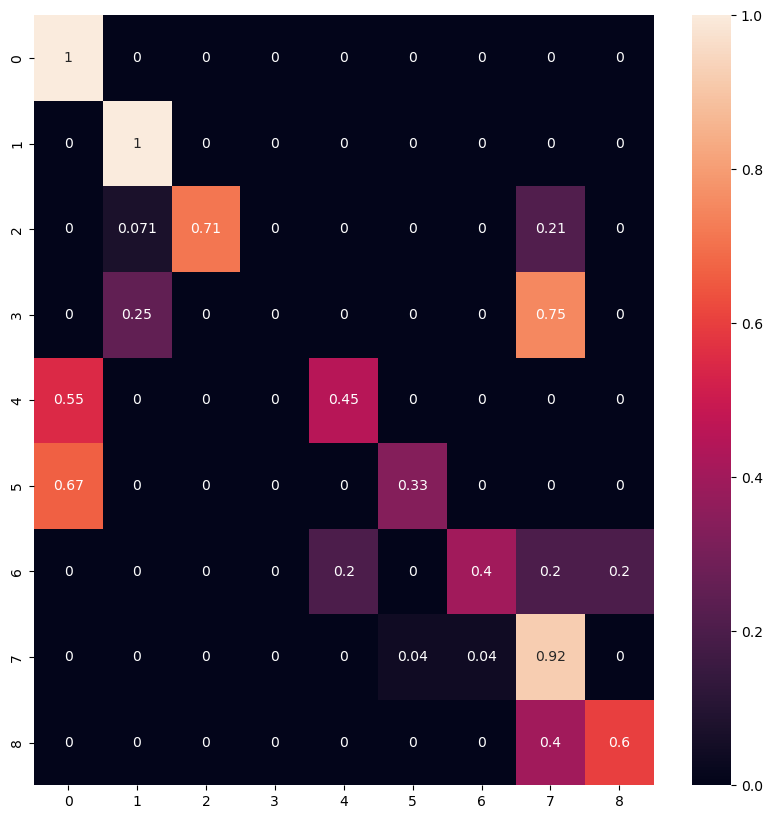

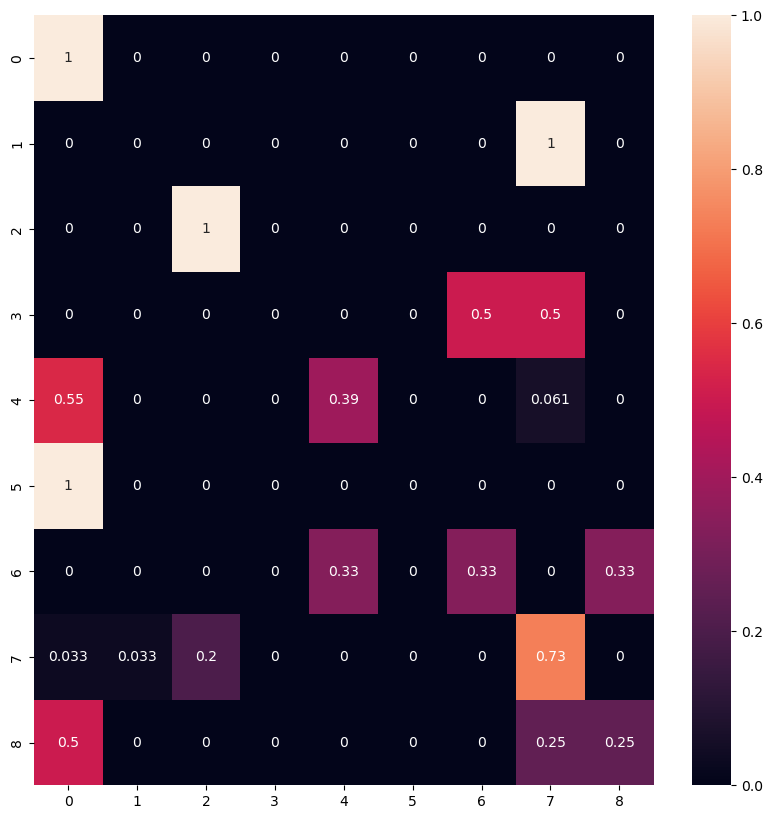

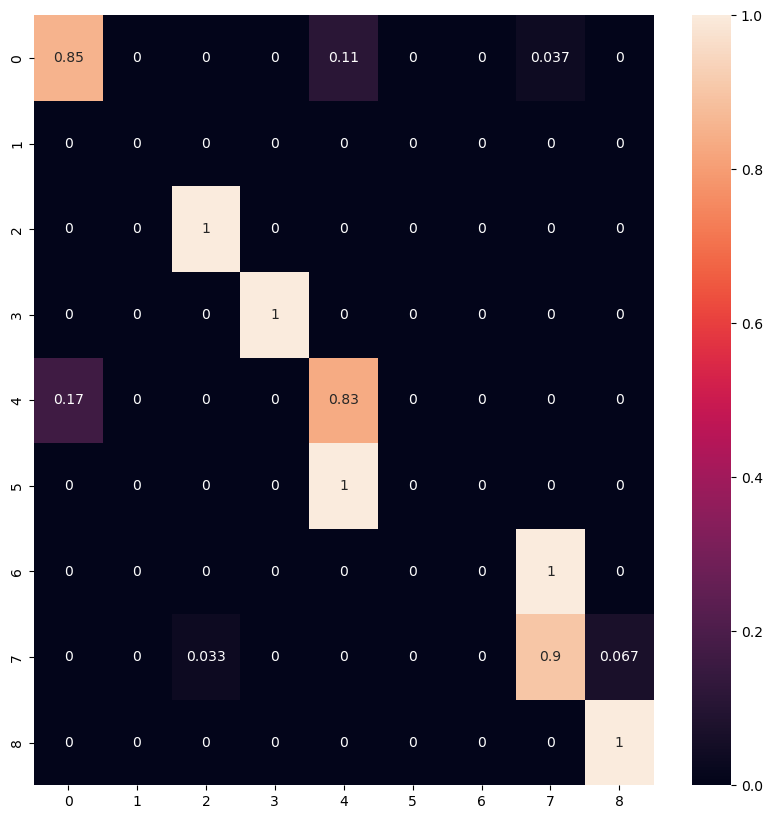

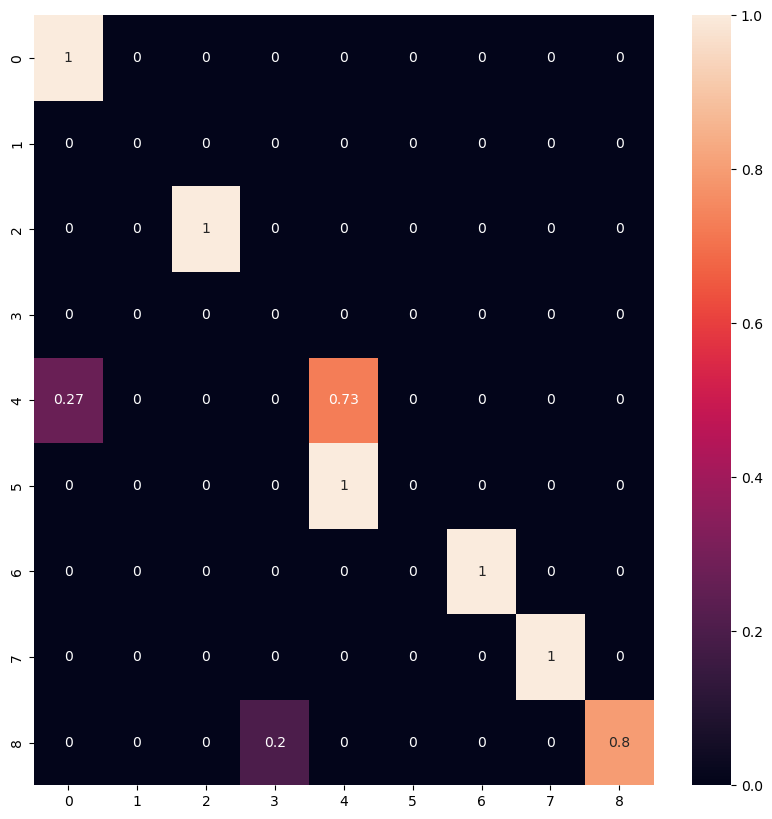

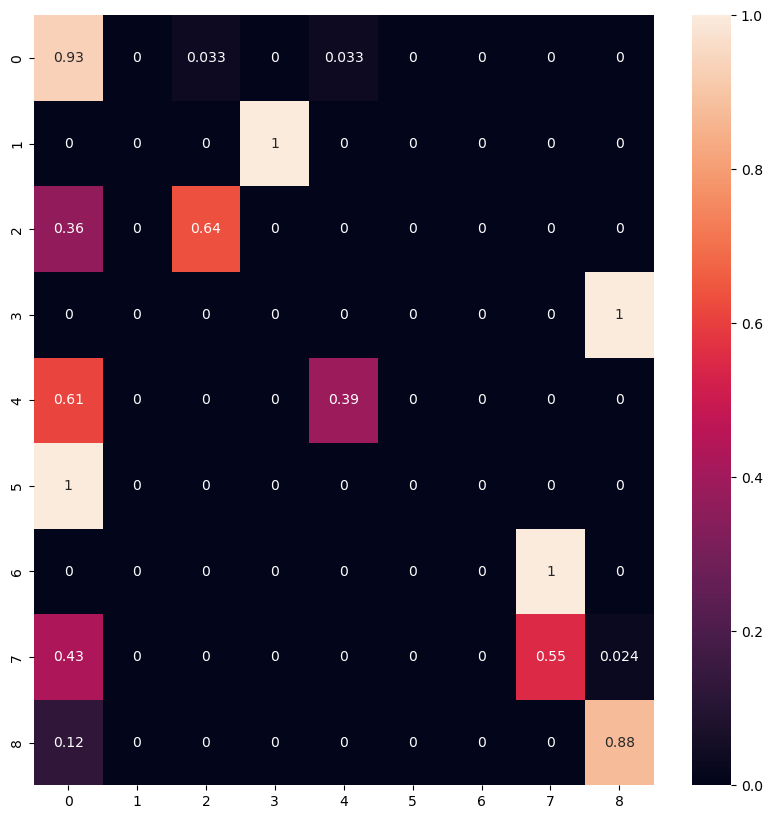

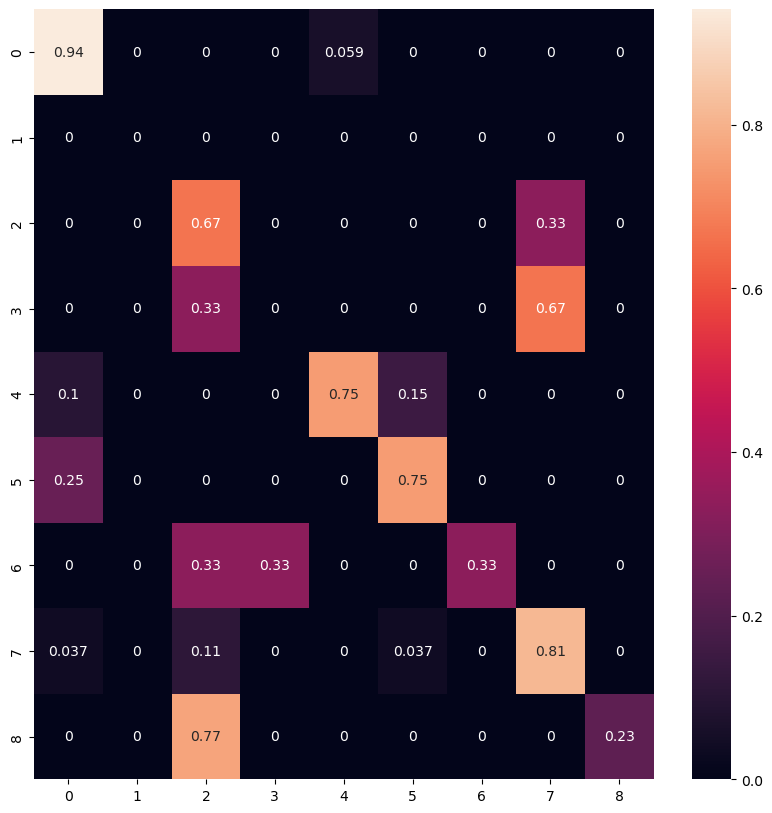

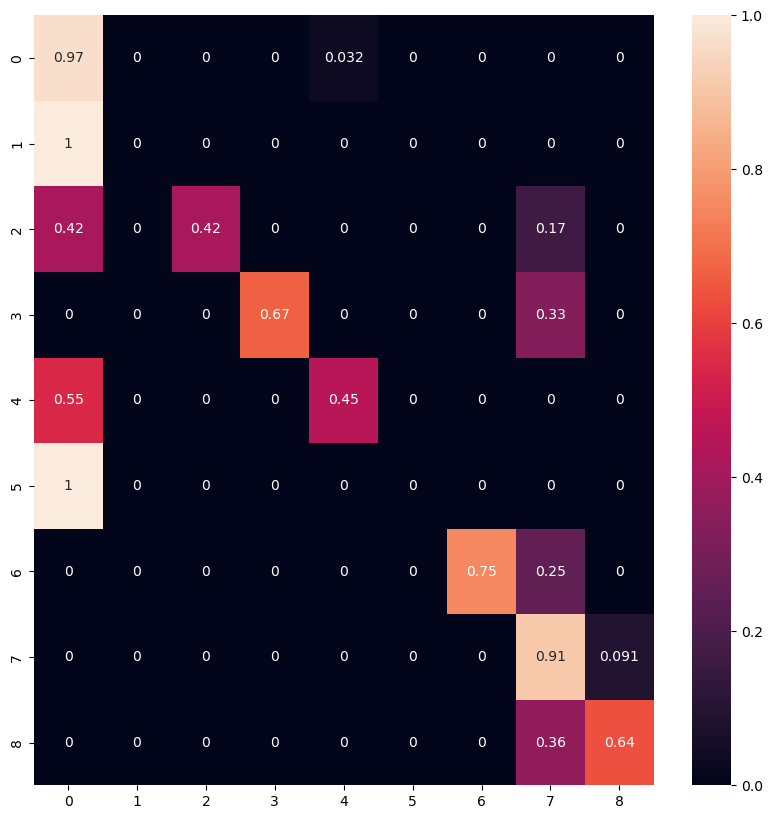

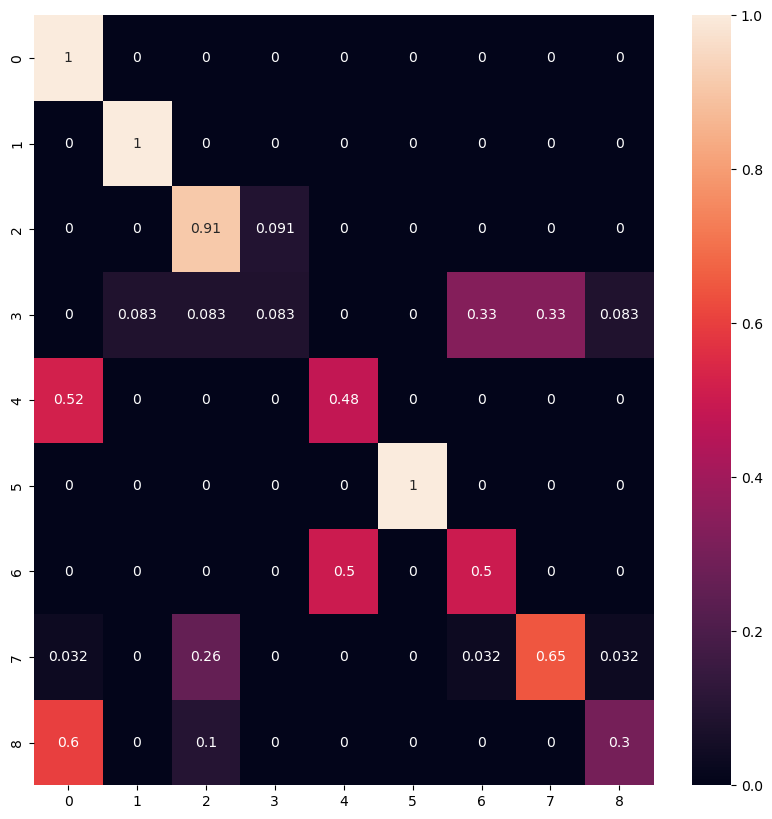

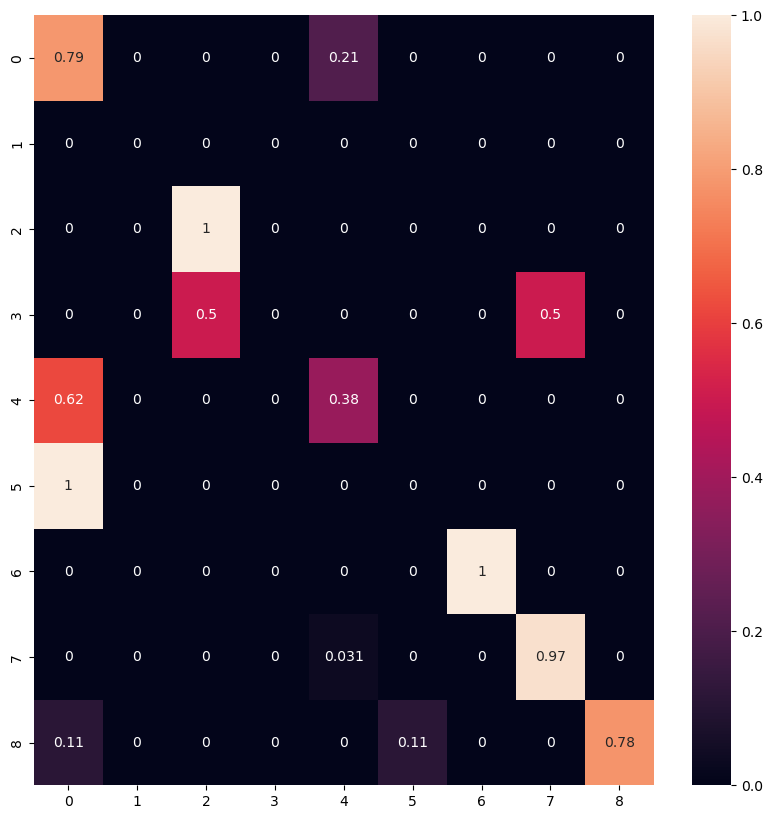

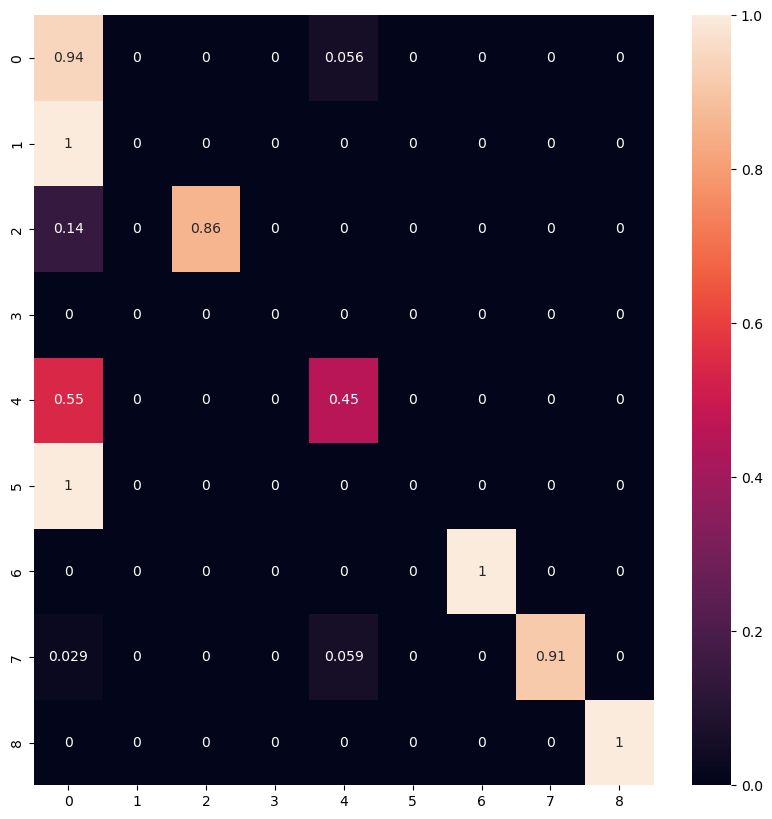

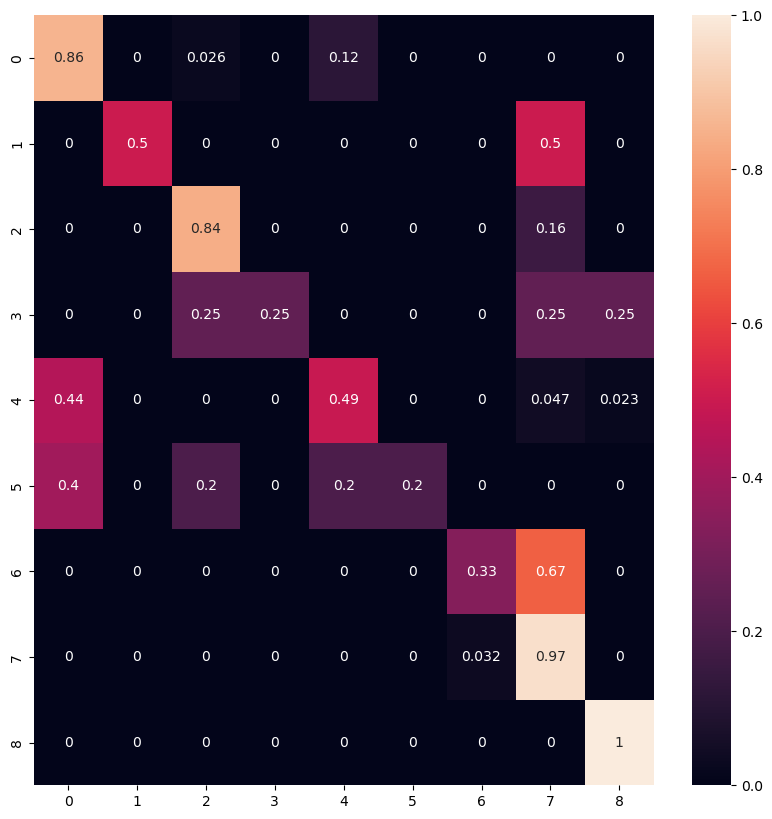

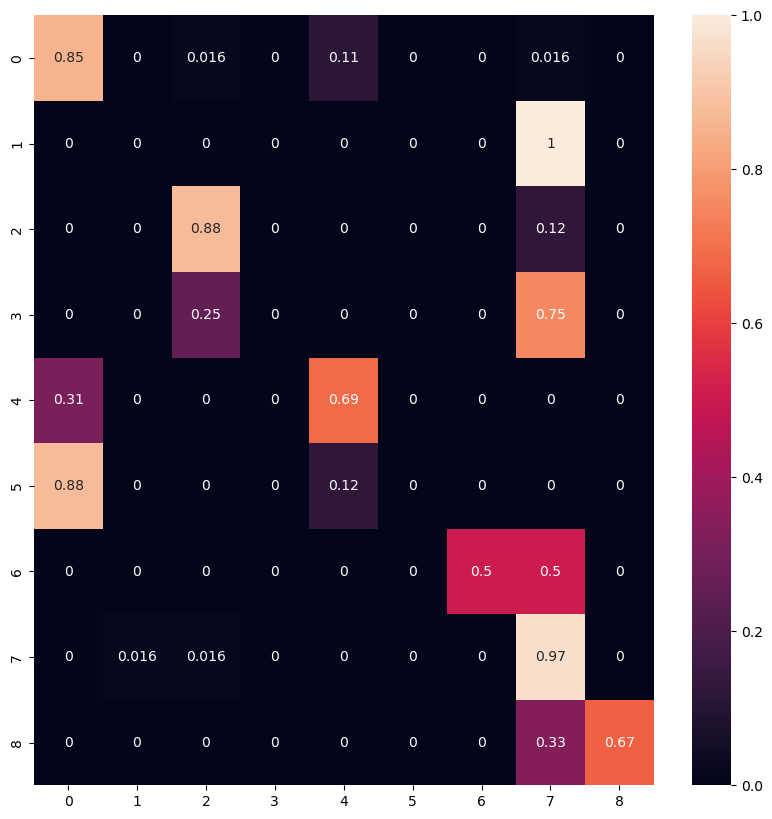

In [52]:
test_set=os.listdir('./test_set_df_acc_window5')
out_rf=[]
for ID in test_set:
    if ID.endswith(".csv"):
        output_rf(ID,out_rf)
out_df=pd.DataFrame(out_rf,columns=['ID','accuracy','weighted avg F1-score',
                                       'F1_score class 0',
                                      'F1_score class 1',
                                      'F1_score class 2',
                                      'F1_score class 3',
                                      'F1_score class 4',
                                      'F1_score class 5',
                                      'F1_score class 6',
                                      'F1_score class 7',
                                      'F1_score class 8'])

out_df.describe()

In [53]:
def output_xgb_2(ID,out):
    warnings.simplefilter('ignore')
    test=pd.read_csv(f'./test_set_df_acc_window5/{ID}')
    X_test=test.drop(["label","previous_label"],axis=1)
#     X_test=X_test[feature_score.nlargest(300,columns="F_Score")['Input_Features'].values]
    y_test=test['label']
    filename = './model_window5/smote_xgb_model2.sav'
    xgbcl=joblib.load(filename)
    # xgbcl=joblib.load(filename)
    pred=xgbcl.predict(X_test)
    
    test['label1']=pred
    # turn2
    test['previous_label']=test['label1']
    test['second_turn']=test['previous_label'].diff()
    test['second_turn']=test.apply(lambda test:second_turn(test['label'],test['second_turn']),axis=1)
    turn=list(test['second_turn'])
    turn_2=[]

    if (test['label'][0].item()>0): 
        count=2
    else: 
        count=1
    for i in range(len(turn)):

        if turn[i]<-3:
            count-=1
        if count<=0:
            turn_2.append(1) 
        else:
            turn_2.append(0) 
    test['turn']=turn
    test['second_turn']=turn_2

    print(list(test['label'])[0])
    def fturn():
        if list(test['label'])[0]>0: 
            after0=1
        else: after0=1
        return after0
    after0=fturn()
    sturn=True
    after1=[]
    for i in range(len(test['label'])):

        if (list(test['label'])[i]==1)|(list(test['label'])[i]==2)|(list(test['label'])[i]==3):
            after0-=1
        if (list(test['second_turn'])[i]>0) and sturn==True:
            after0=fturn()
            sturn=False
        if after0<=0:
    #         print(after0)
            after1.append(1) 
        else:
            after1.append(0) 
    test['after1']=after1
    after4=[]
    after0=fturn()
    sturn=True
    for i in range(len(test['label'])):
        if (list(test['label'])[i]==4)|(list(test['label'])[i]==5)|(list(test['label'])[i]==6):
            after0-=1
        if (list(test['second_turn'])[i]>0) and sturn==True:
            after0=fturn()
            sturn=False
        if after0<=0:
    #         print(after0)
            after4.append(1) 
        else:
            after4.append(0) 

    test['after4']=after4
    test=test.drop(['second_turn','turn'],axis=1)
    X_test_a=test.drop(["label","previous_label",'label1'],axis=1)
    # X_test=X_test[feature_score.nlargest(300,columns="F_Score")['Input_Features'].values]
    y_test_a=test['label']
    filename = './model_window5/smote_xgb_model_after.sav'
    HGBC=joblib.load( filename)
    pred=HGBC.predict(X_test_a)
    acc= metrics.accuracy_score(pred,y_test)
    f1s=metrics.f1_score(y_test,pred,average='weighted')
    f1=metrics.f1_score(y_test,pred,average=None,labels=range(9),zero_division= np.nan)
    f1s0=f1[0]
    f1s1=f1[1]
    f1s2=f1[2]
    f1s3=f1[3]
    f1s4=f1[4]
    f1s5=f1[5]
    f1s6=f1[6]
    f1s7=f1[7]
    f1s8=f1[8]
    ax,fig=plt.subplots(figsize=(10,10))
    conf=metrics.confusion_matrix(y_test,pred,labels=[i for i in range(9)]
                                  , normalize='true')
    sns.heatmap(conf,annot=True)
#     print(ID)
#     print(np.unique(pred))
#     print(np.unique(y_test))
#     plt.savefig(f"./image/xgb_gan_window1/confusion_matrix_{ID[:5]}.png")
    return out.append([ID[:5],acc,f1s,f1s0,f1s1,f1s2,f1s3,f1s4,f1s5,f1s6,f1s7,f1s8])

8
8
8
8
8
8
8
8
8
8
8
8


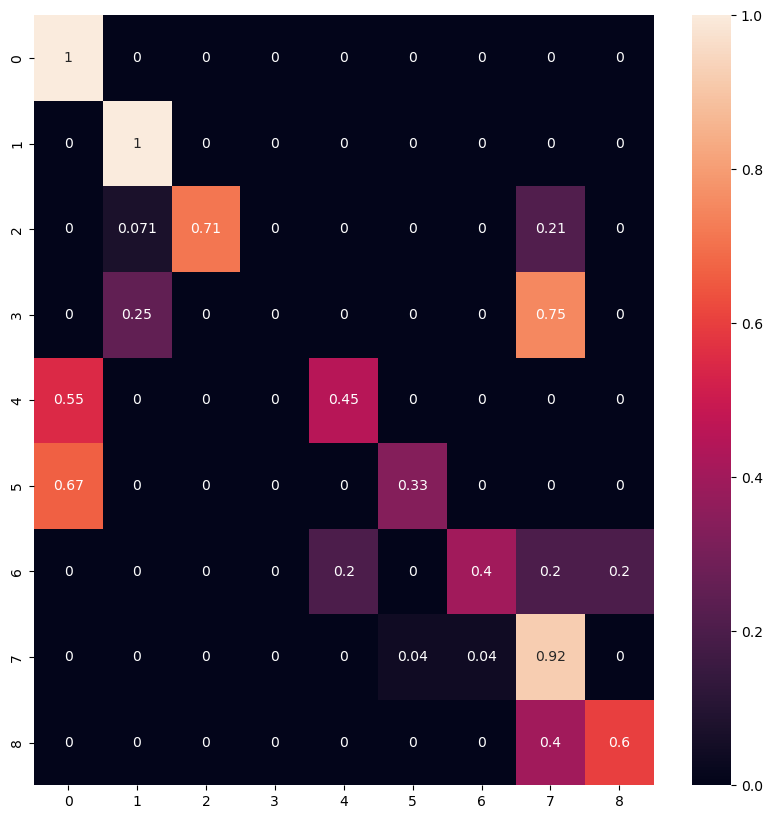

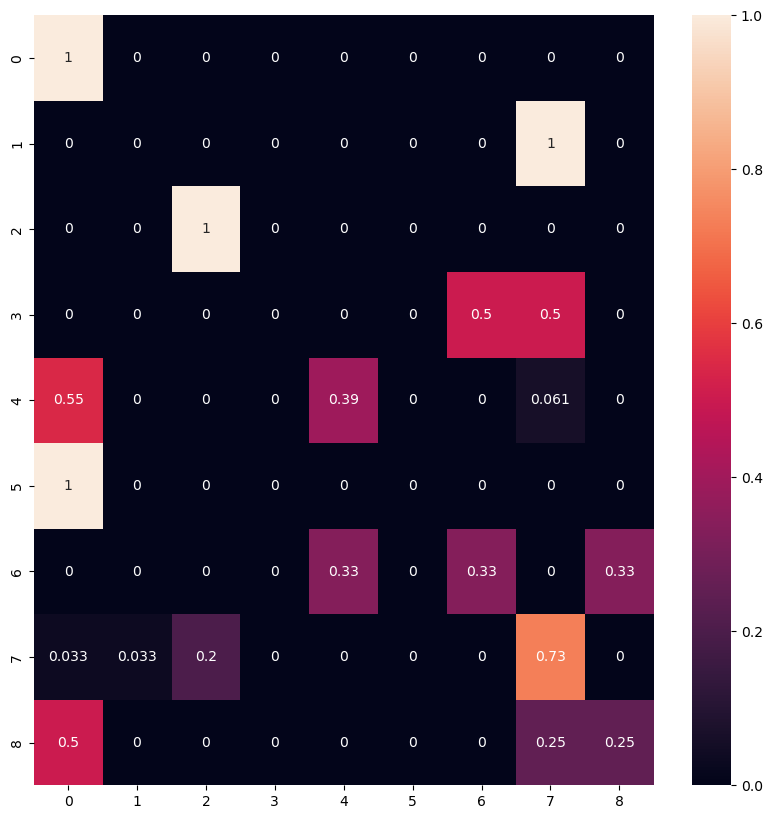

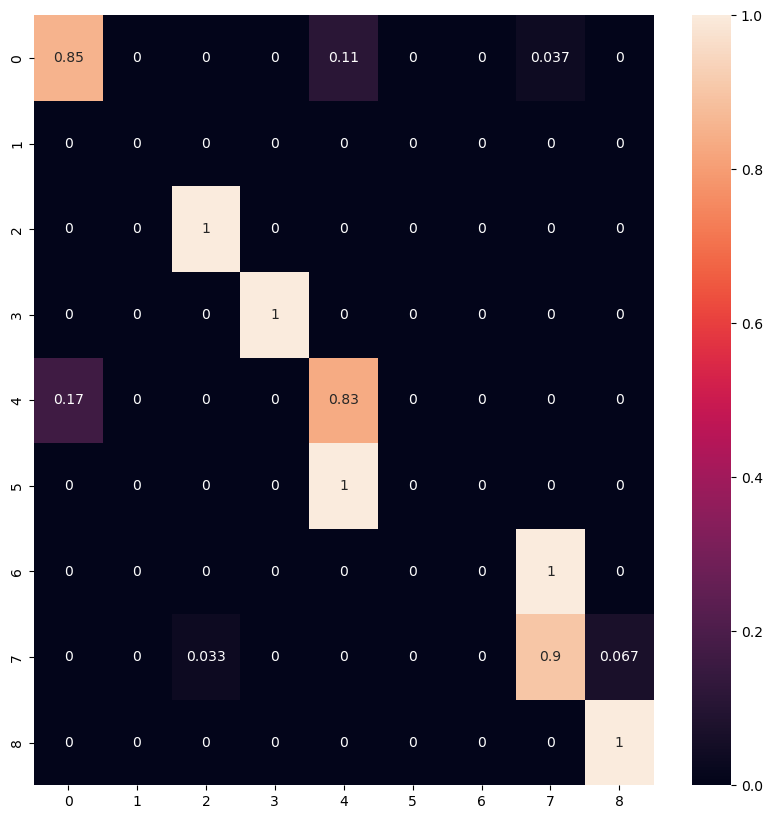

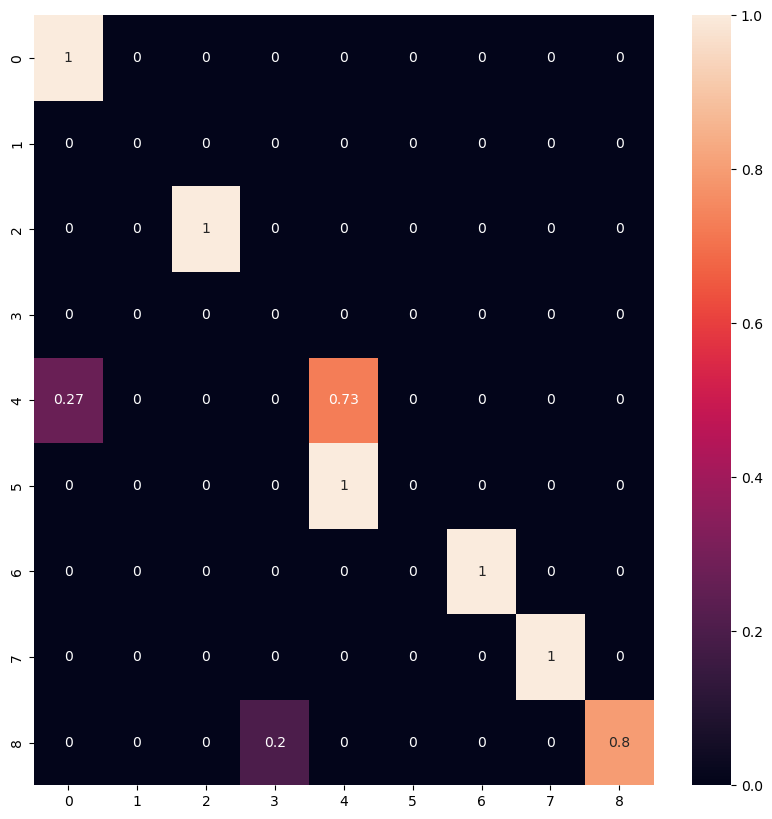

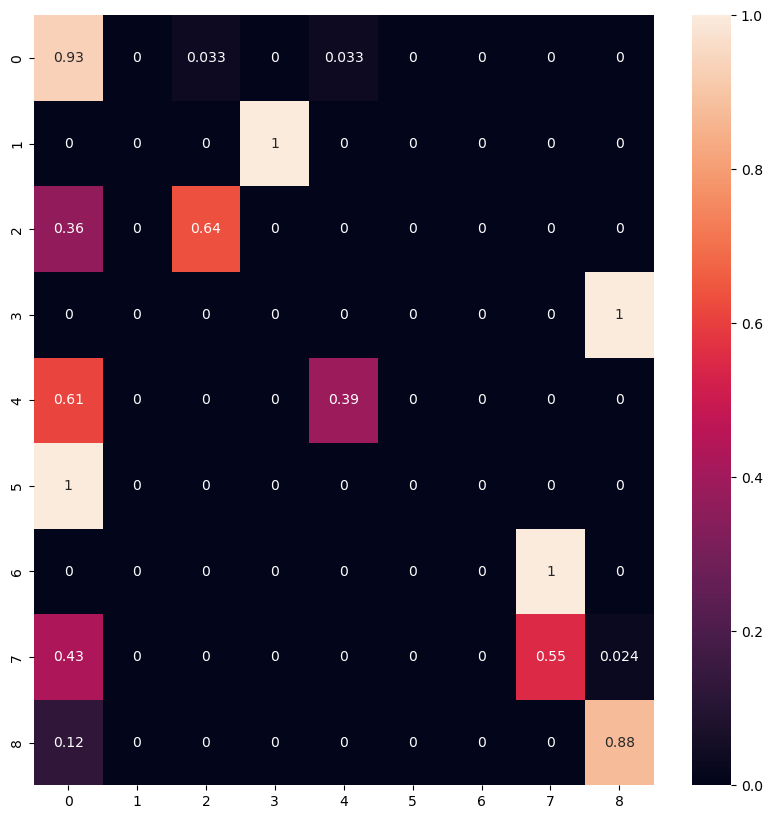

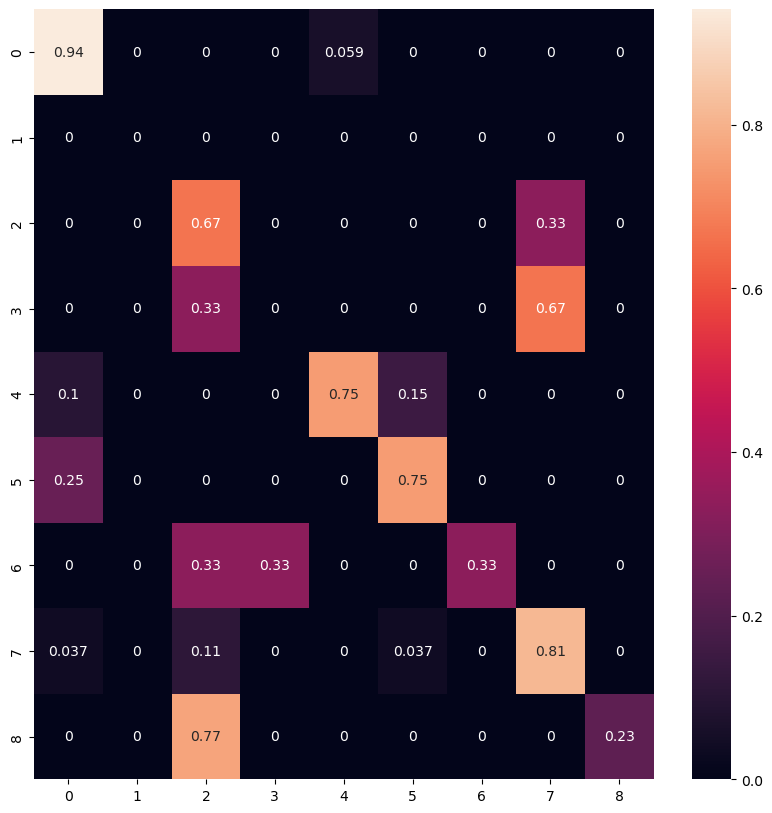

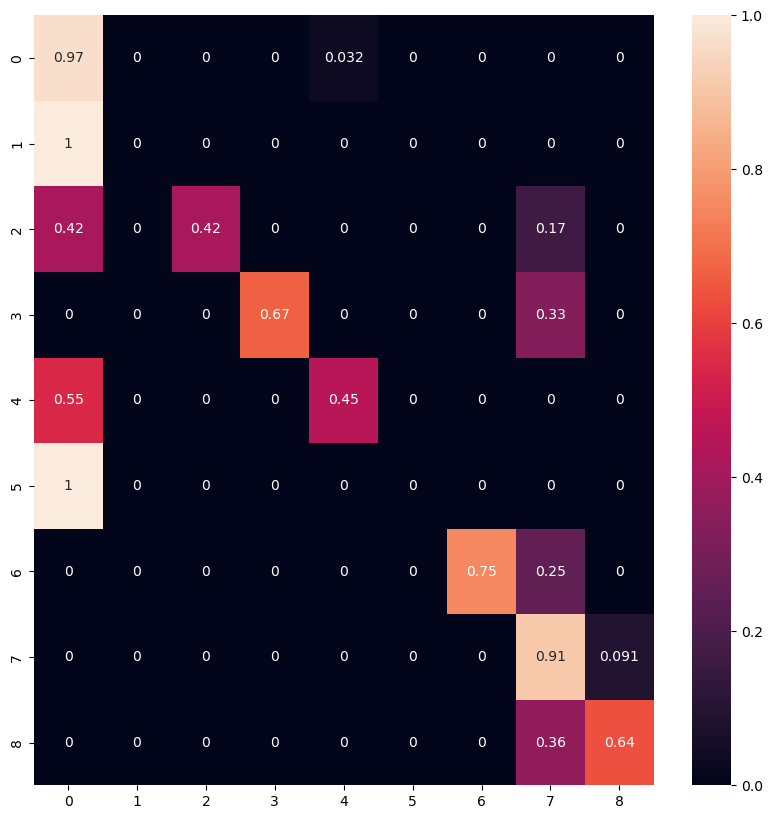

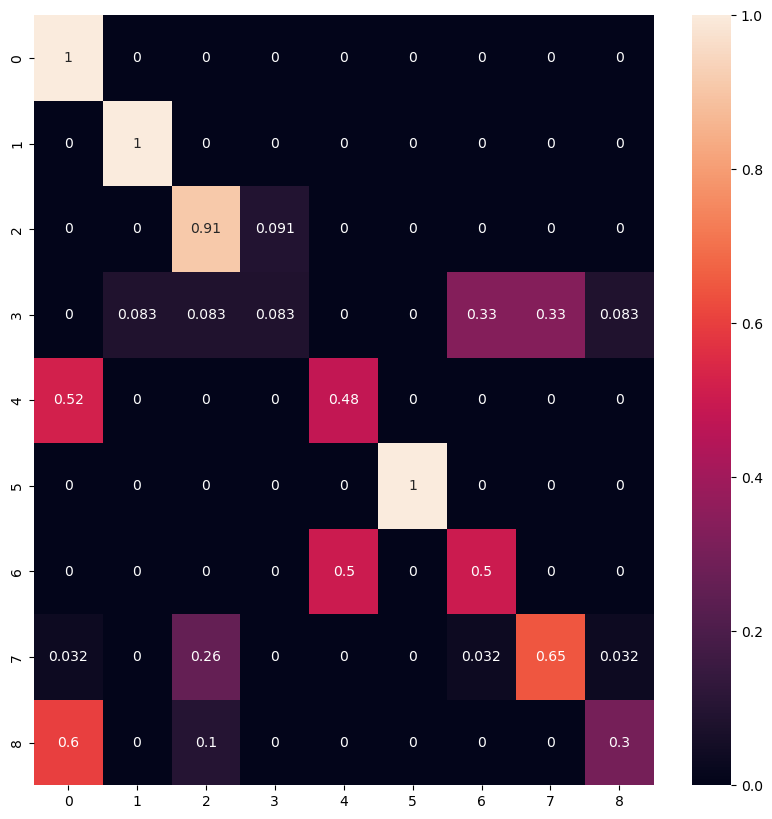

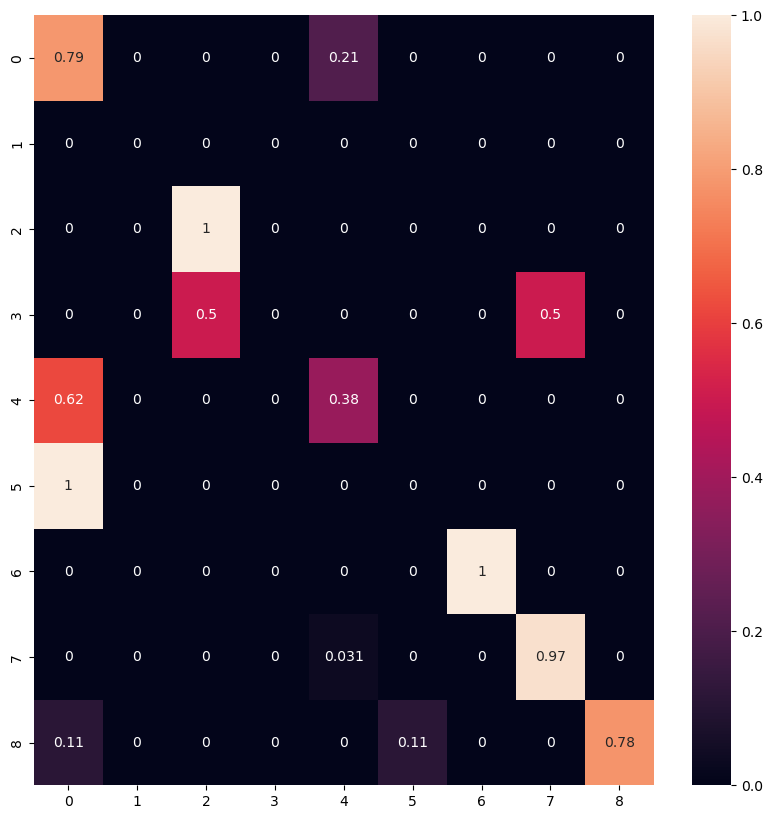

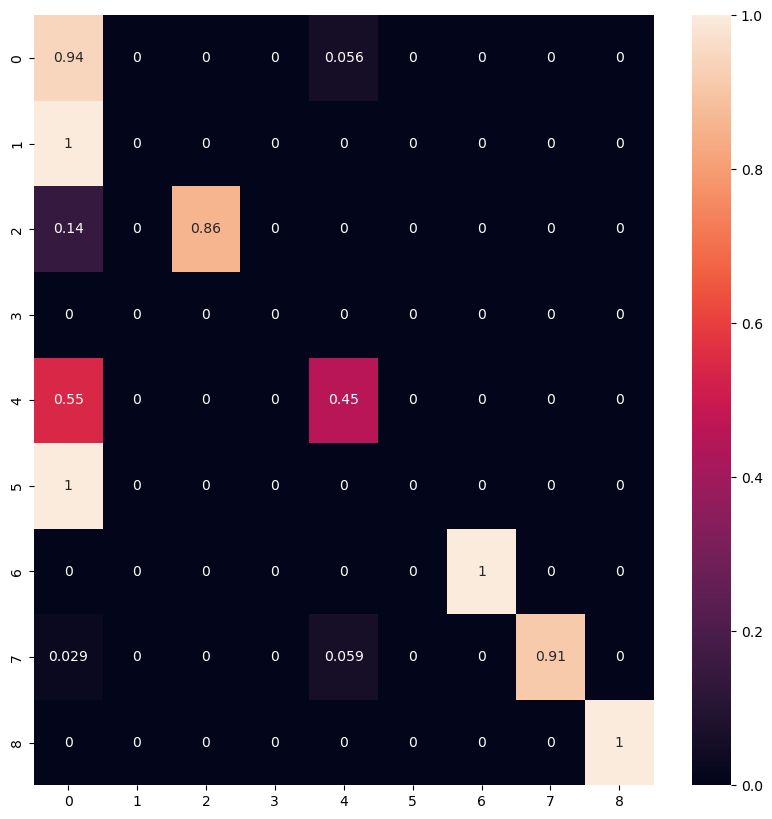

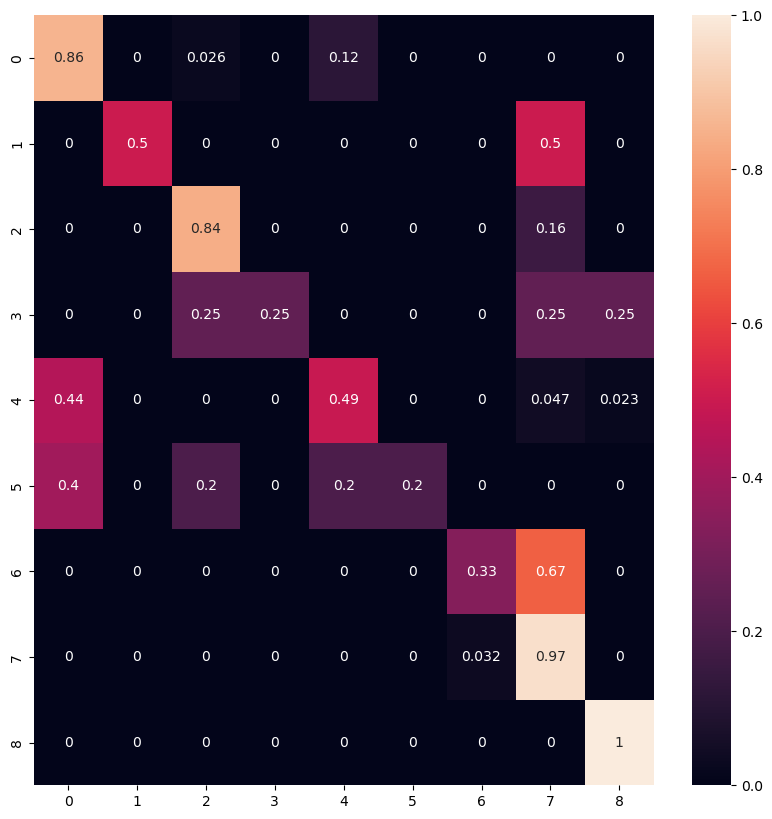

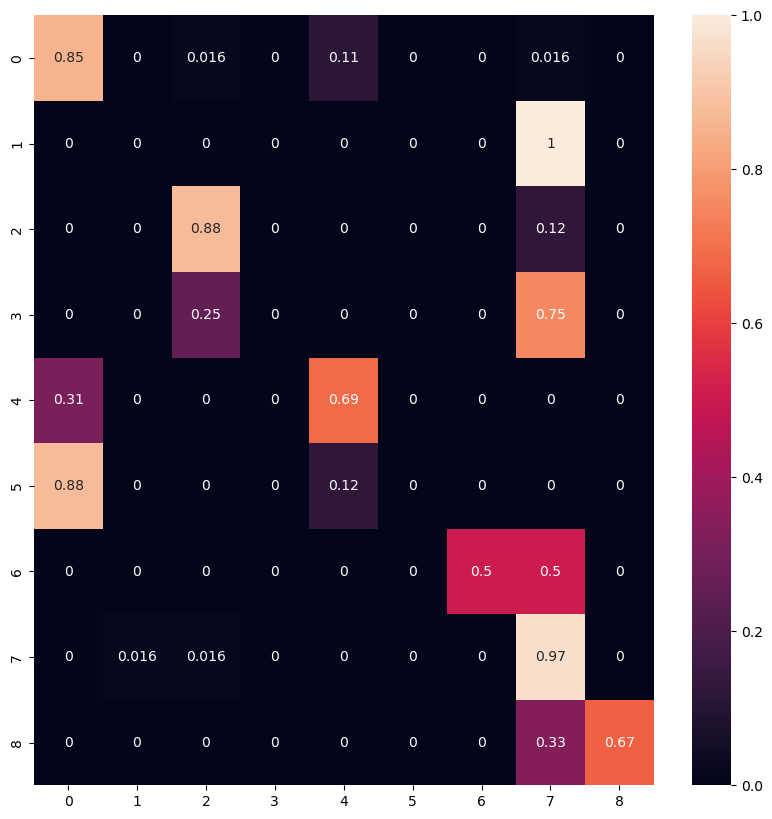

In [54]:
test_set=os.listdir('./test_set_df_acc_window5')
out_xgb2=[]
for ID in test_set:
    if ID.endswith(".csv"):
        output_rf(ID,out_xgb2)
out_df2=pd.DataFrame(out_xgb2,columns=['ID','accuracy','weighted avg F1-score',
                                       'F1_score class 0',
                                      'F1_score class 1',
                                      'F1_score class 2',
                                      'F1_score class 3',
                                      'F1_score class 4',
                                      'F1_score class 5',
                                      'F1_score class 6',
                                      'F1_score class 7',
                                      'F1_score class 8'])


In [55]:
def output_ada(ID,out):
    warnings.simplefilter('ignore')
    test=pd.read_csv(f'./test_set_df_acc_window5/{ID}')
    X_test=test.drop(["label","previous_label"],axis=1)
#     X_test=X_test[feature_score.nlargest(300,columns="F_Score")['Input_Features'].values]
    y_test=test['label']
    filename = './model_window5/smote_xgb_model2.sav'
    xgbcl=joblib.load(filename)
    # xgbcl=joblib.load(filename)
    pred=xgbcl.predict(X_test)
    
    test['label1']=pred
    # turn2
    test['previous_label']=test['label1']
    test['second_turn']=test['previous_label'].diff()
    test['second_turn']=test.apply(lambda test:second_turn(test['label'],test['second_turn']),axis=1)
    turn=list(test['second_turn'])
    turn_2=[]

    if (test['label'][0].item()>0): 
        count=2
    else: 
        count=1
    for i in range(len(turn)):

        if turn[i]<-3:
            count-=1
        if count<=0:
            turn_2.append(1) 
        else:
            turn_2.append(0) 
    test['turn']=turn
    test['second_turn']=turn_2

    print(list(test['label'])[0])
    def fturn():
        if list(test['label'])[0]>0: 
            after0=1
        else: after0=1
        return after0
    after0=fturn()
    sturn=True
    after1=[]
    for i in range(len(test['label'])):

        if (list(test['label'])[i]==1)|(list(test['label'])[i]==2)|(list(test['label'])[i]==3):
            after0-=1
        if (list(test['second_turn'])[i]>0) and sturn==True:
            after0=fturn()
            sturn=False
        if after0<=0:
    #         print(after0)
            after1.append(1) 
        else:
            after1.append(0) 
    test['after1']=after1
    after4=[]
    after0=fturn()
    sturn=True
    for i in range(len(test['label'])):
        if (list(test['label'])[i]==4)|(list(test['label'])[i]==5)|(list(test['label'])[i]==6):
            after0-=1
        if (list(test['second_turn'])[i]>0) and sturn==True:
            after0=fturn()
            sturn=False
        if after0<=0:
    #         print(after0)
            after4.append(1) 
        else:
            after4.append(0) 

    test['after4']=after4
    test=test.drop(['second_turn','turn'],axis=1)
    X_test_a=test.drop(["label","previous_label",'label1'],axis=1)
    # X_test=X_test[feature_score.nlargest(300,columns="F_Score")['Input_Features'].values]
    y_test_a=test['label']
    filename = './model_window5/smote_grid_model_after.sav'
    HGBC=joblib.load( filename)
    pred=HGBC.predict(X_test_a)
    acc= metrics.accuracy_score(pred,y_test)
    f1s=metrics.f1_score(y_test,pred,average='weighted')
    f1=metrics.f1_score(y_test,pred,average=None,labels=range(9),zero_division= np.nan)
    f1s0=f1[0]
    f1s1=f1[1]
    f1s2=f1[2]
    f1s3=f1[3]
    f1s4=f1[4]
    f1s5=f1[5]
    f1s6=f1[6]
    f1s7=f1[7]
    f1s8=f1[8]
    ax,fig=plt.subplots(figsize=(10,10))
    conf=metrics.confusion_matrix(y_test,pred,labels=[i for i in range(9)]
                                  , normalize='true')
    sns.heatmap(conf,annot=True)
#     print(ID)
#     print(np.unique(pred))
#     print(np.unique(y_test))
#     plt.savefig(f"./image/xgb_gan_window1/confusion_matrix_{ID[:5]}.png")
    return out.append([ID[:5],acc,f1s,f1s0,f1s1,f1s2,f1s3,f1s4,f1s5,f1s6,f1s7,f1s8])

8
8
8
8
8
8
8
8
8
8
8
8


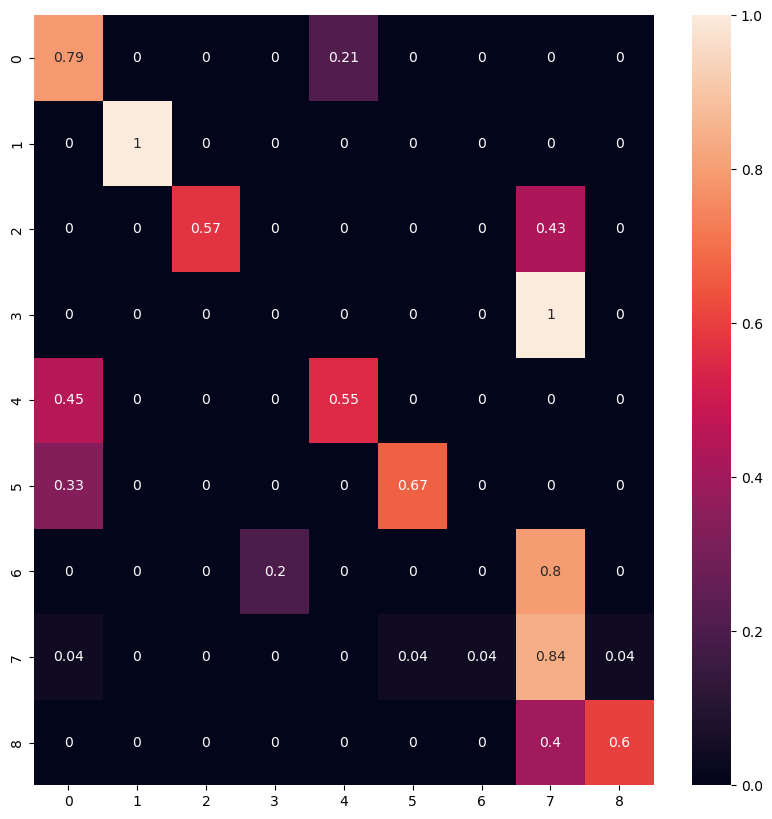

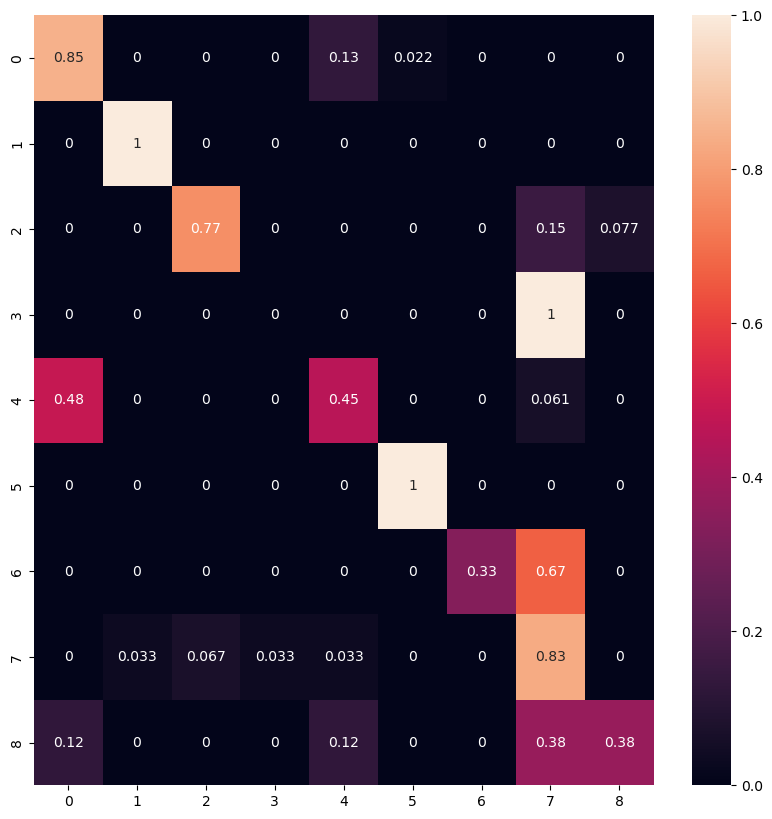

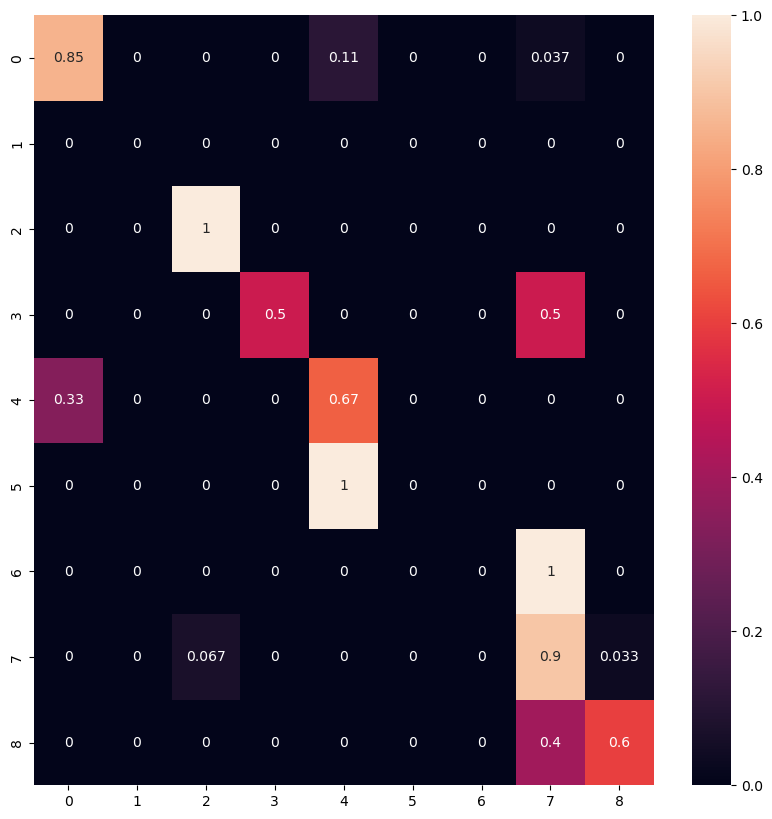

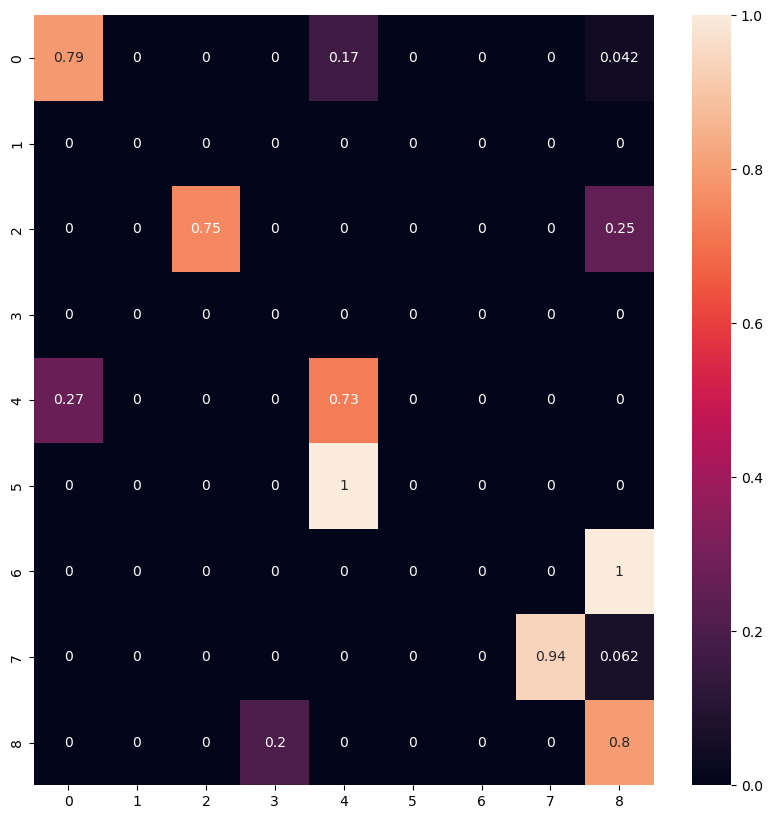

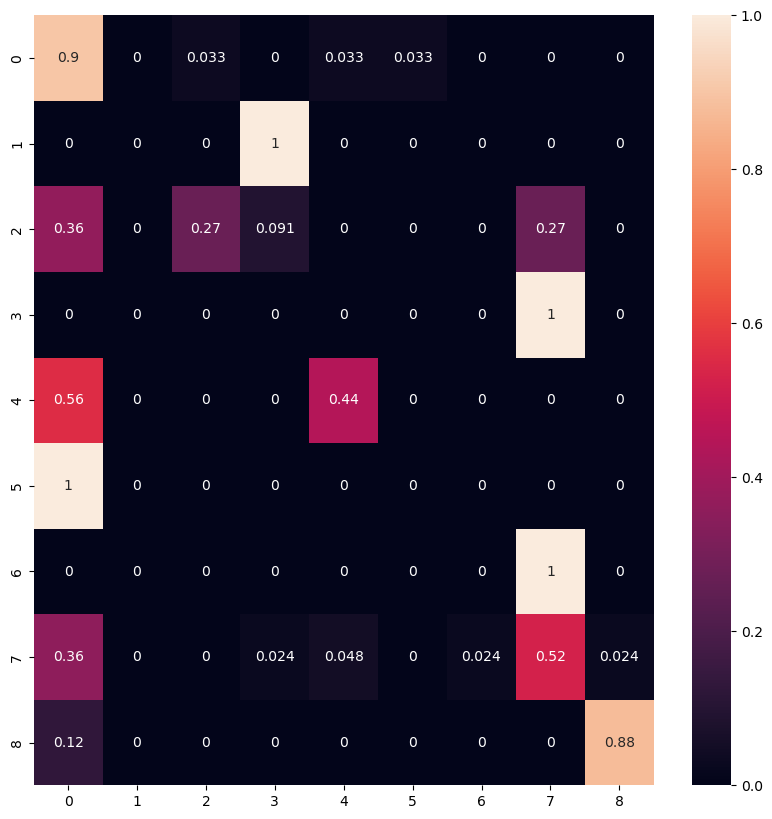

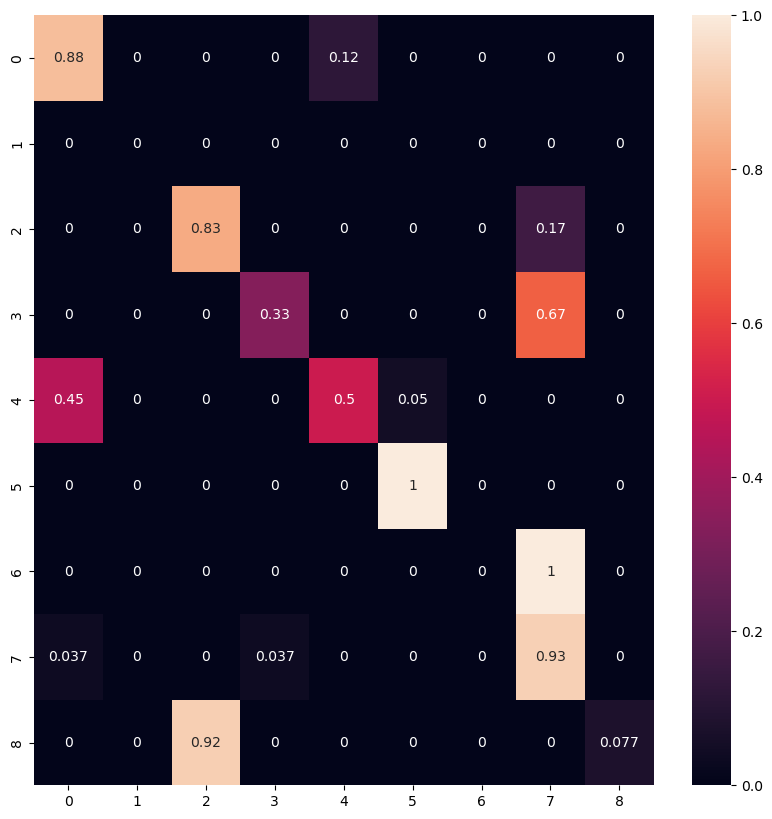

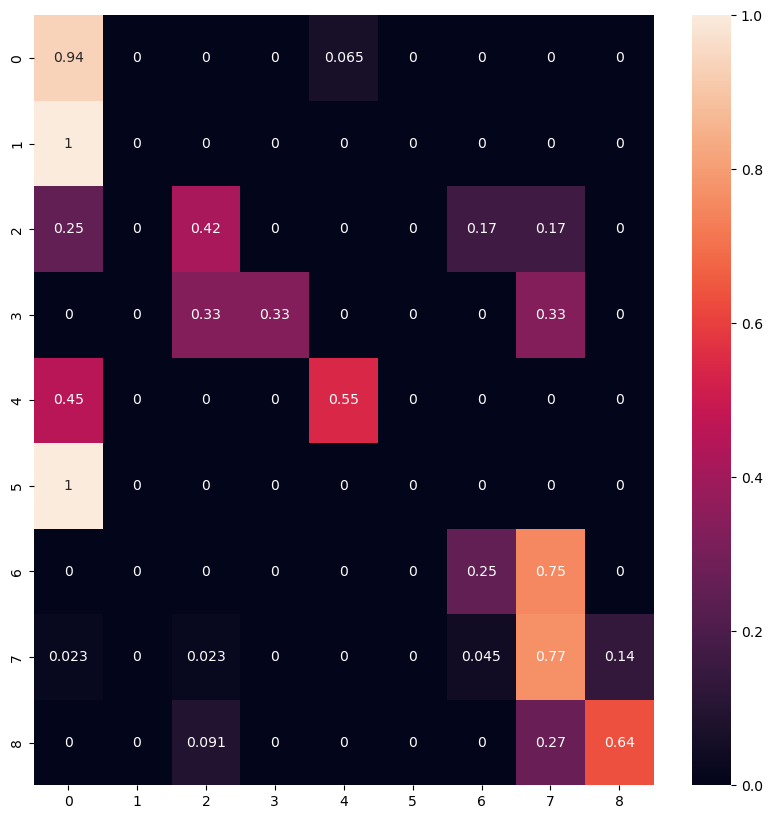

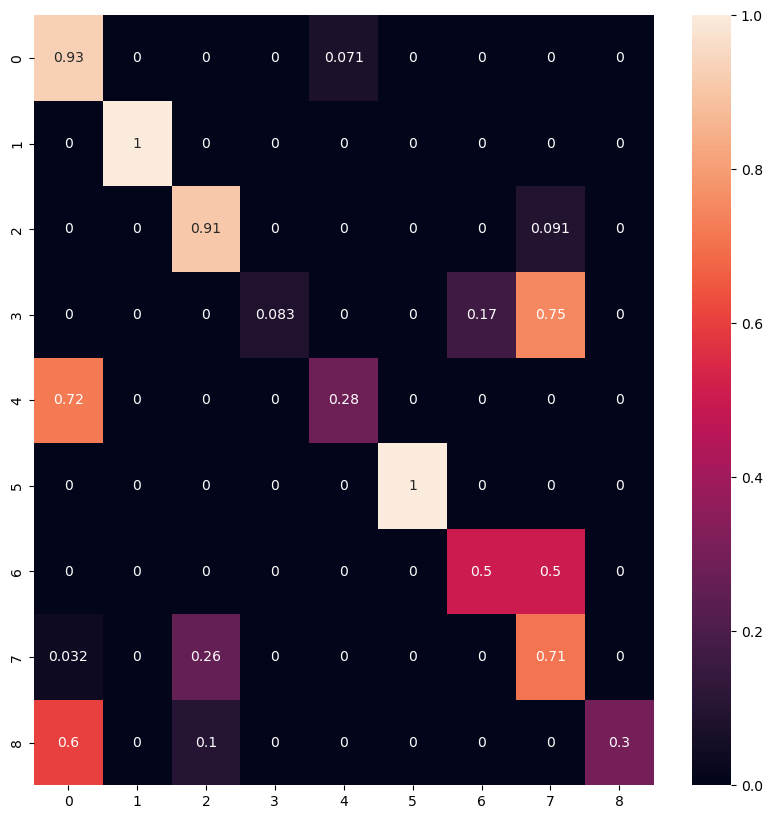

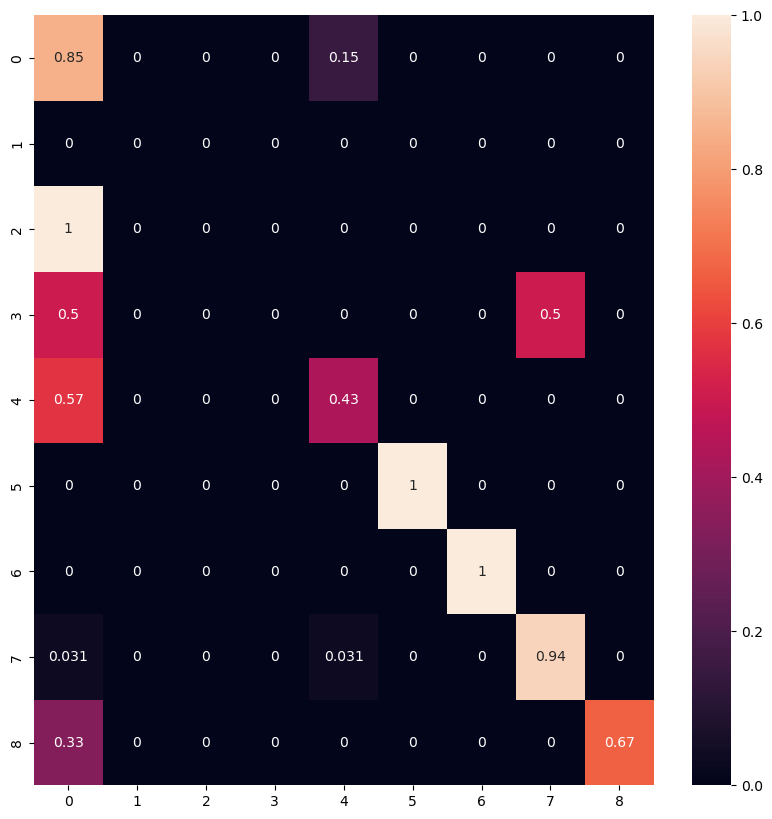

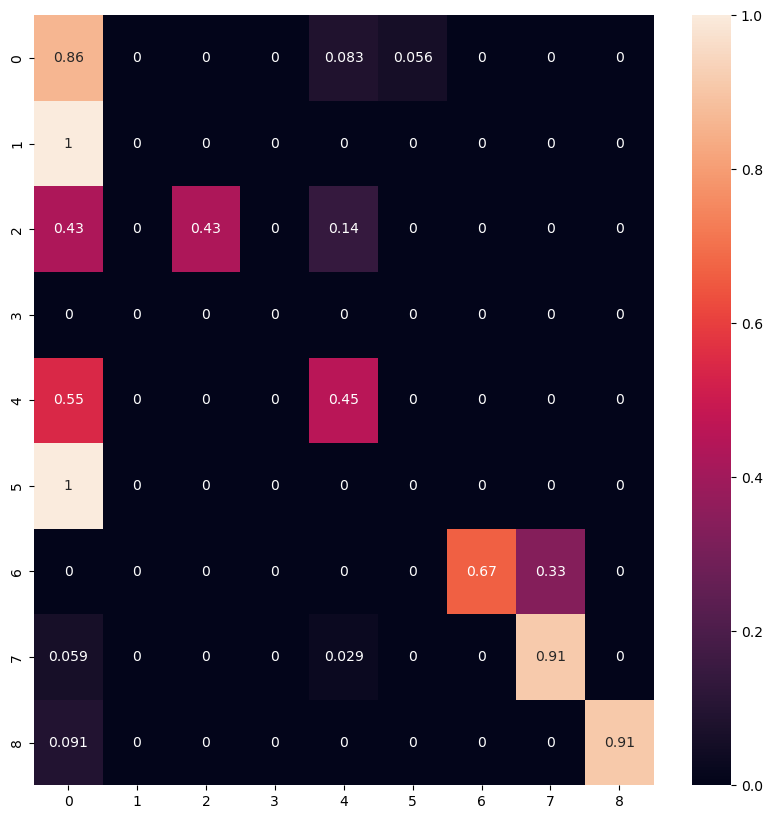

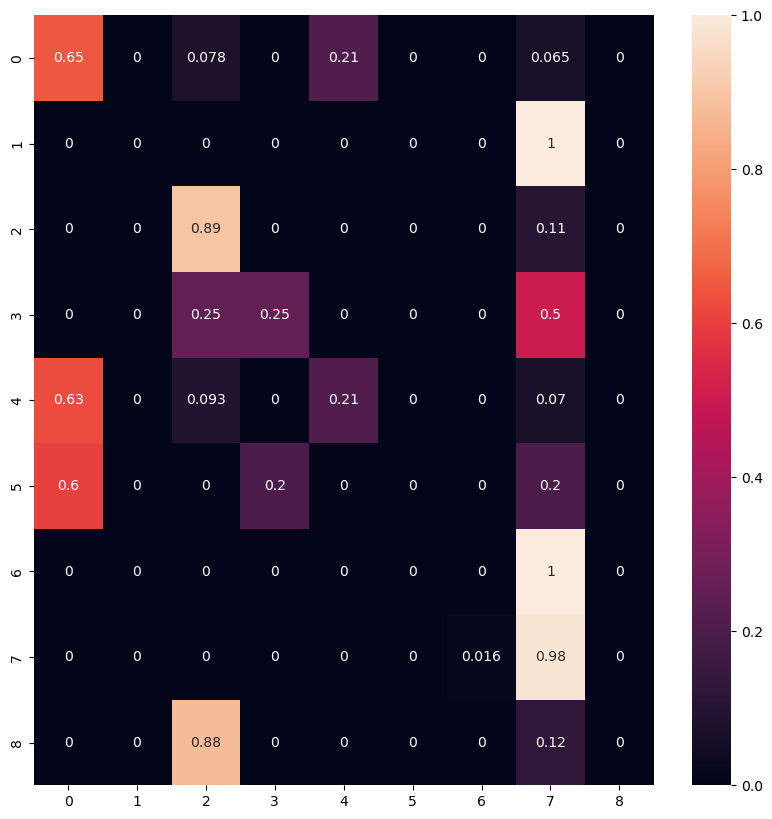

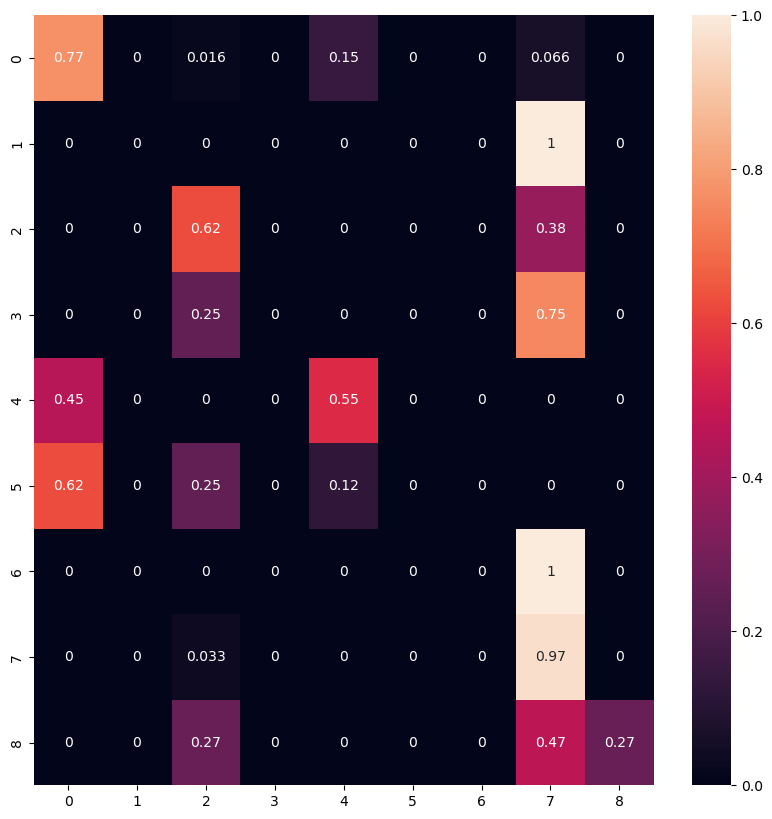

In [56]:
test_set=os.listdir('./test_set_df_acc_window5')
out_ada=[]
for ID in test_set:
    if ID.endswith(".csv"):
        output_ada(ID,out_ada)
out_ada=pd.DataFrame(out_ada,columns=['ID','accuracy','weighted avg F1-score',
                                       'F1_score class 0',
                                      'F1_score class 1',
                                      'F1_score class 2',
                                      'F1_score class 3',
                                      'F1_score class 4',
                                      'F1_score class 5',
                                      'F1_score class 6',
                                      'F1_score class 7',
                                      'F1_score class 8'])

In [57]:
out_df.describe()#HGBC not rf model :(  HGBC HGBC

,accuracy,weighted avg F1-score,F1_score class 0,F1_score class 1,F1_score class 2,F1_score class 3,F1_score class 4,F1_score class 5,F1_score class 6,F1_score class 7,F1_score class 8
count,12.000000,12.000000,12.000000,3.000000,12.000000,4.000000,12.000000,4.000000,10.000000,12.000000,12.000000
mean,0.761895,0.743410,0.798244,0.611111,0.772848,0.585714,0.627920,0.569697,0.650714,0.855609,0.716898
std,0.078772,0.083109,0.093872,0.096225,0.182088,0.386507,0.111242,0.300229,0.294101,0.102503,0.225809
min,0.637097,0.626370,0.595745,0.500000,0.320000,0.142857,0.432432,0.333333,0.250000,0.666667,0.363636
25%,0.718669,0.703149,0.769931,0.583333,0.713922,0.335714,0.554965,0.383333,0.425000,0.791704,0.577273
50%,0.748077,0.727766,0.797788,0.666667,0.826923,0.600000,0.607378,0.472727,0.583333,0.875081,0.816667
75%,0.795807,0.780905,0.847241,0.666667,0.865079,0.850000,0.728999,0.659091,0.964286,0.926431,0.878472
max,0.912500,0.900408,0.941176,0.666667,1.000000,1.000000,0.810811,1.000000,1.000000,1.000000,1.000000


In [58]:
out_df_xgb.describe()#XGB HGBC

,accuracy,weighted avg F1-score,F1_score class 0,F1_score class 1,F1_score class 2,F1_score class 3,F1_score class 4,F1_score class 5,F1_score class 6,F1_score class 7,F1_score class 8
count,12.000000,12.000000,12.000000,3.000000,12.000000,4.000000,12.000000,4.000000,10.000000,12.000000,12.000000
mean,0.765029,0.746442,0.803792,0.611111,0.772848,0.585714,0.635047,0.569697,0.650714,0.855609,0.716898
std,0.077246,0.081862,0.084168,0.096225,0.182088,0.386507,0.110034,0.300229,0.294101,0.102503,0.225809
min,0.645161,0.633073,0.610526,0.500000,0.320000,0.142857,0.533333,0.333333,0.250000,0.666667,0.363636
25%,0.716883,0.694579,0.778774,0.583333,0.713922,0.335714,0.558889,0.383333,0.425000,0.791704,0.577273
50%,0.764072,0.741674,0.806285,0.666667,0.826923,0.600000,0.594697,0.472727,0.583333,0.875081,0.816667
75%,0.810688,0.784197,0.823877,0.666667,0.865079,0.850000,0.657229,0.659091,0.964286,0.926431,0.878472
max,0.902439,0.891974,0.945455,0.666667,1.000000,1.000000,0.869565,1.000000,1.000000,1.000000,1.000000


In [59]:
out_df2.describe()#XGB XGB

,accuracy,weighted avg F1-score,F1_score class 0,F1_score class 1,F1_score class 2,F1_score class 3,F1_score class 4,F1_score class 5,F1_score class 6,F1_score class 7,F1_score class 8
count,12.000000,12.000000,12.000000,3.000000,12.000000,4.000000,12.000000,4.000000,10.000000,12.000000,12.000000
mean,0.761895,0.743410,0.798244,0.611111,0.772848,0.585714,0.627920,0.569697,0.650714,0.855609,0.716898
std,0.078772,0.083109,0.093872,0.096225,0.182088,0.386507,0.111242,0.300229,0.294101,0.102503,0.225809
min,0.637097,0.626370,0.595745,0.500000,0.320000,0.142857,0.432432,0.333333,0.250000,0.666667,0.363636
25%,0.718669,0.703149,0.769931,0.583333,0.713922,0.335714,0.554965,0.383333,0.425000,0.791704,0.577273
50%,0.748077,0.727766,0.797788,0.666667,0.826923,0.600000,0.607378,0.472727,0.583333,0.875081,0.816667
75%,0.795807,0.780905,0.847241,0.666667,0.865079,0.850000,0.728999,0.659091,0.964286,0.926431,0.878472
max,0.912500,0.900408,0.941176,0.666667,1.000000,1.000000,0.810811,1.000000,1.000000,1.000000,1.000000


In [60]:
out_ada.describe()

,accuracy,weighted avg F1-score,F1_score class 0,F1_score class 1,F1_score class 2,F1_score class 3,F1_score class 4,F1_score class 5,F1_score class 6,F1_score class 7,F1_score class 8
count,12.000000,12.000000,12.000000,3.000000,11.000000,5.000000,12.000000,5.000000,5.000000,12.000000,11.000000
mean,0.694148,0.670406,0.734577,0.933333,0.633732,0.410769,0.544098,0.882540,0.584444,0.814454,0.606286
std,0.065796,0.076473,0.075019,0.115470,0.153101,0.190766,0.114635,0.136821,0.312852,0.113805,0.231482
min,0.596774,0.571309,0.606742,0.800000,0.400000,0.153846,0.264706,0.666667,0.222222,0.611111,0.142857
25%,0.654412,0.624405,0.698797,0.900000,0.527778,0.333333,0.526786,0.857143,0.400000,0.740057,0.480769
50%,0.687762,0.661874,0.740474,1.000000,0.629630,0.400000,0.568966,0.888889,0.500000,0.840278,0.583333
75%,0.716908,0.700610,0.776232,1.000000,0.763636,0.500000,0.613846,1.000000,0.800000,0.887601,0.733333
max,0.804878,0.798110,0.851852,1.000000,0.857143,0.666667,0.666667,1.000000,1.000000,0.967742,0.952381
